In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.gaussian_process import 

In [2]:
data = pd.read_csv("heart_attack_diagonostics.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
data.drop_duplicates(keep = 'first', inplace = True)

<Axes: xlabel='sex', ylabel='count'>

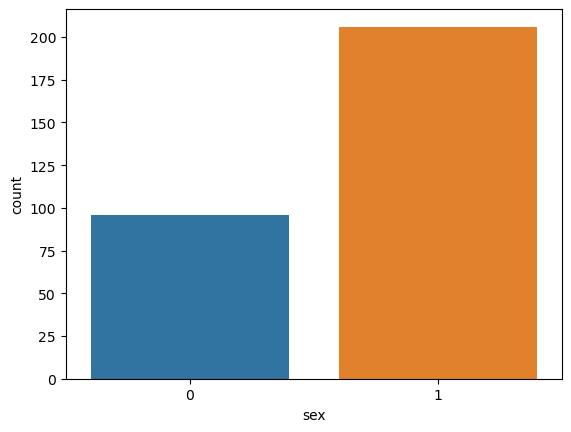

In [8]:
sns.countplot(data = data, x = 'sex')

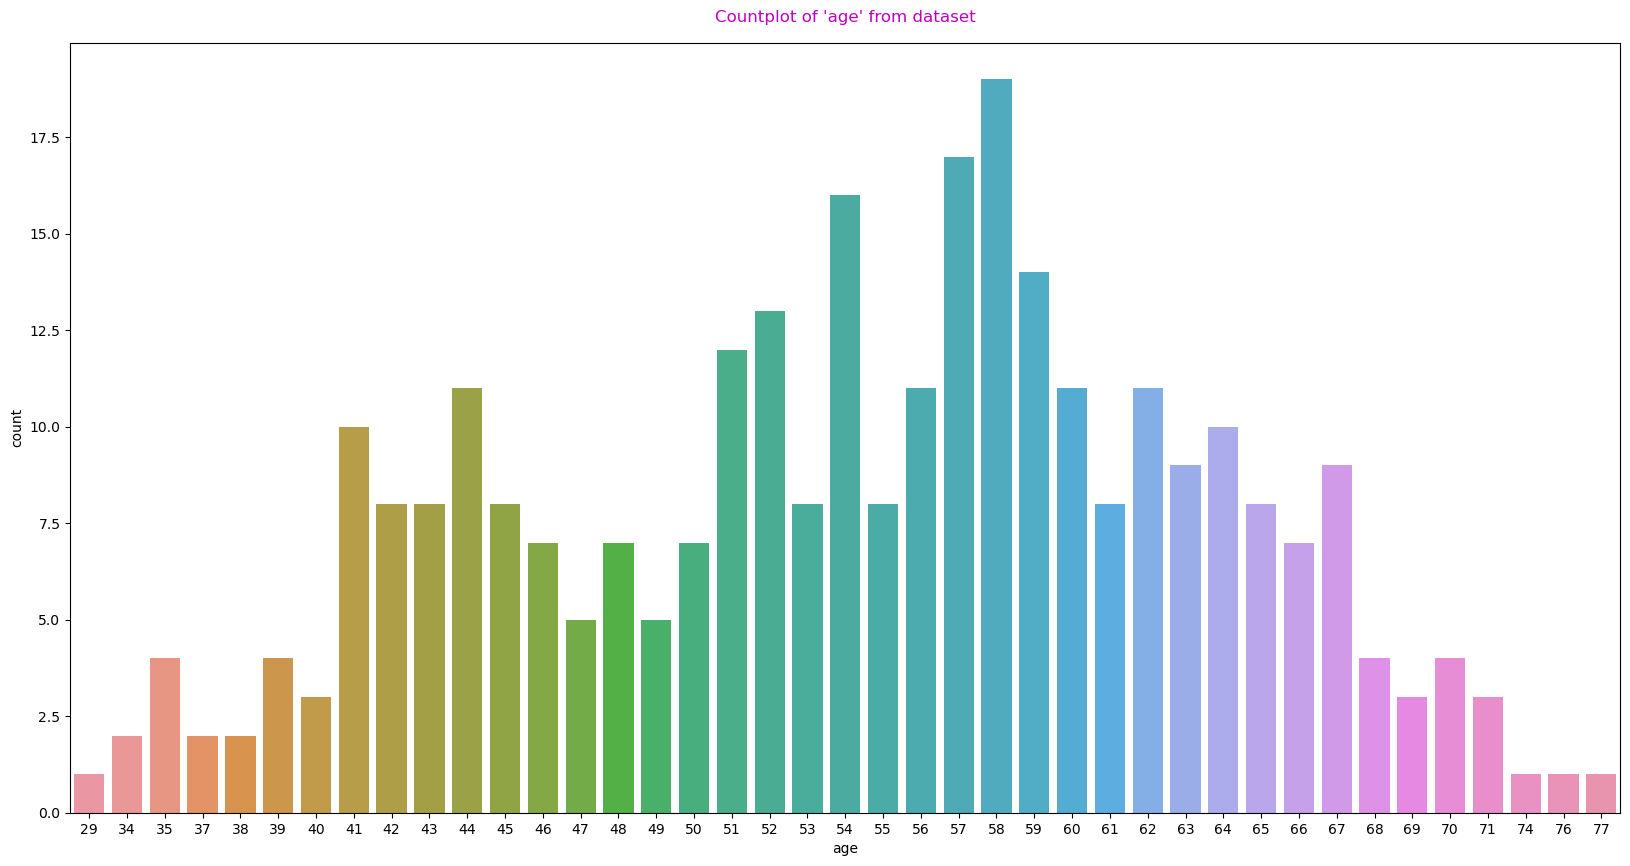

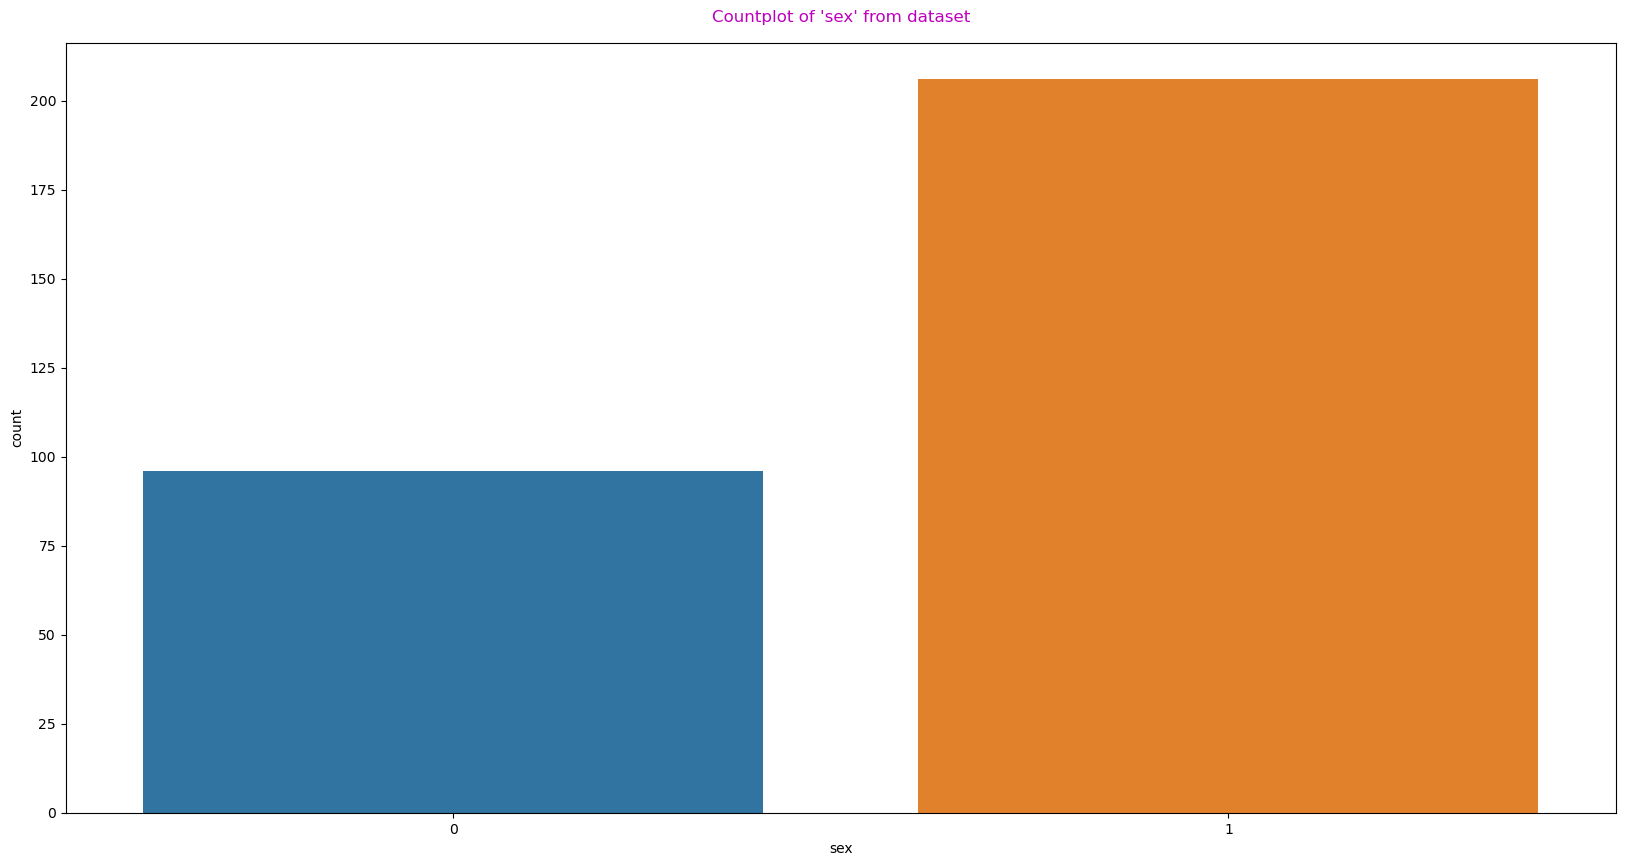

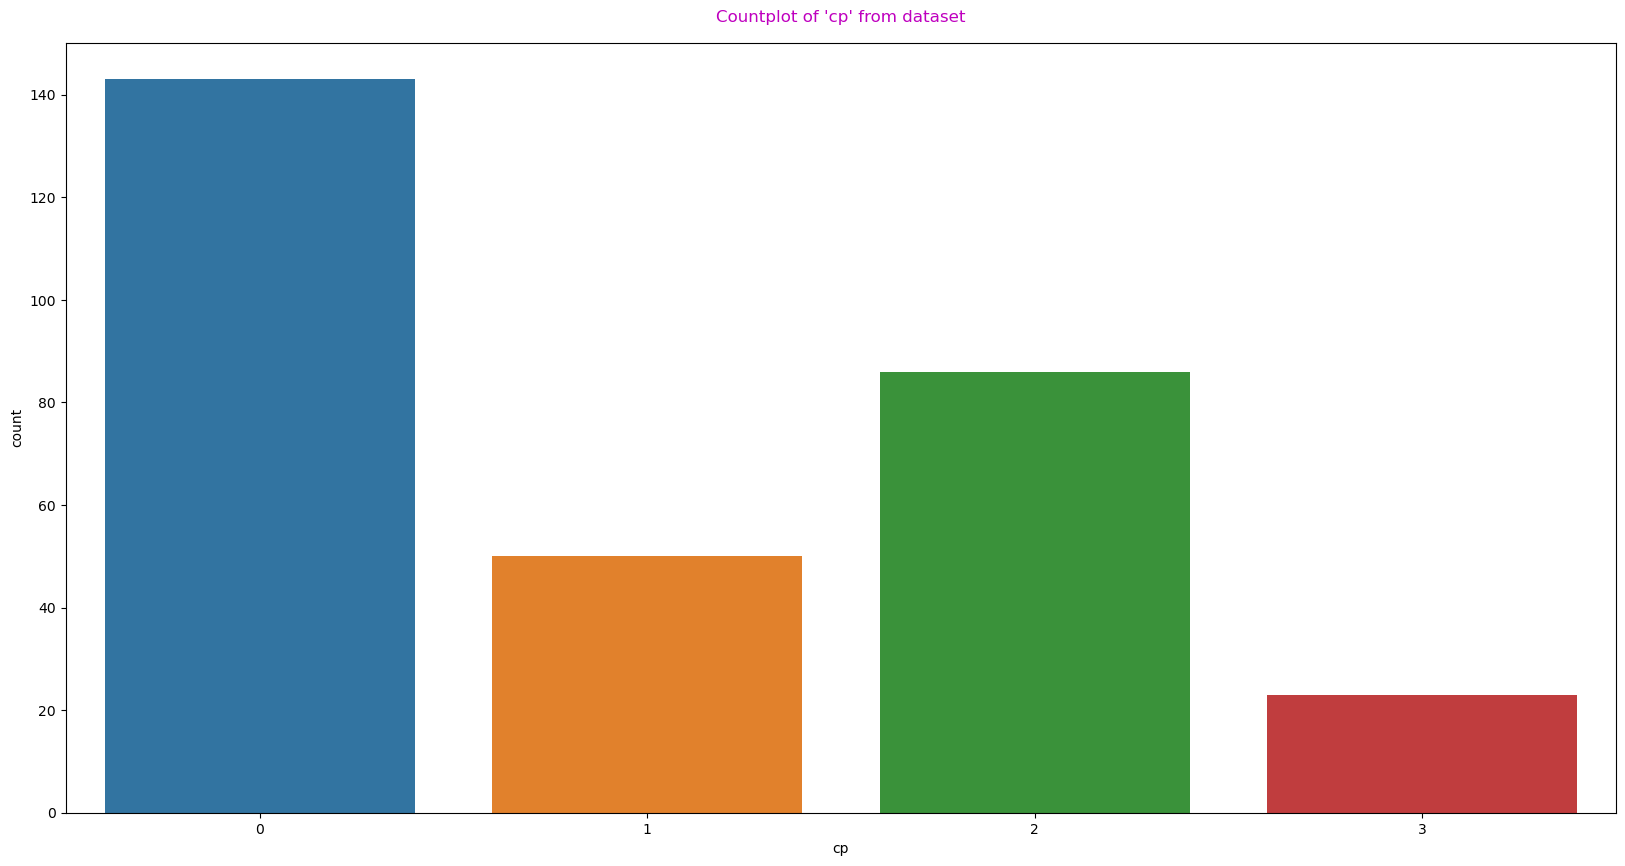

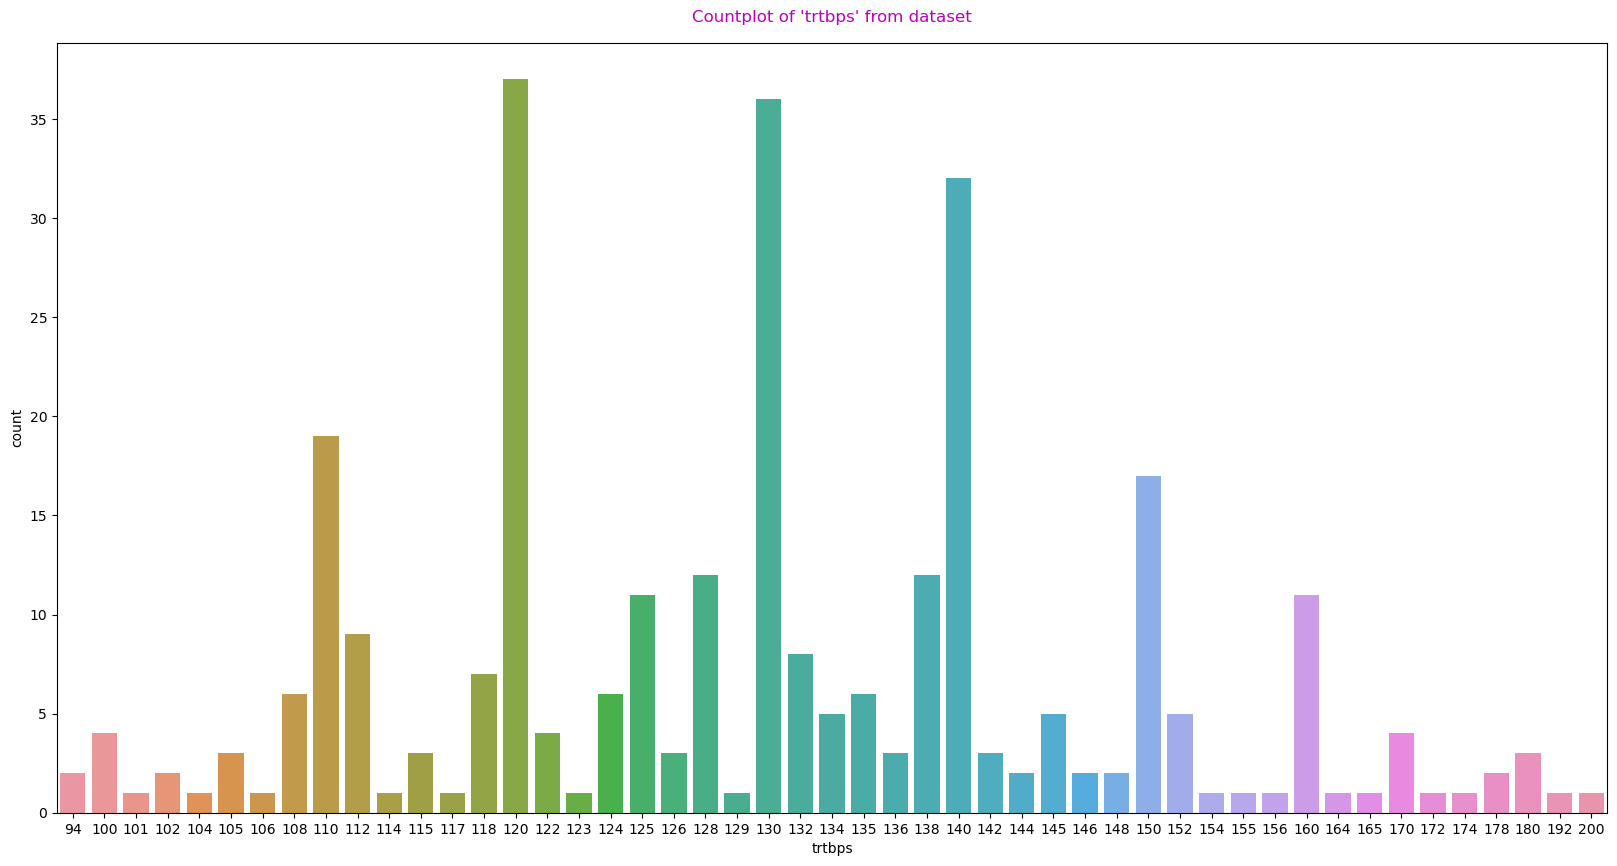

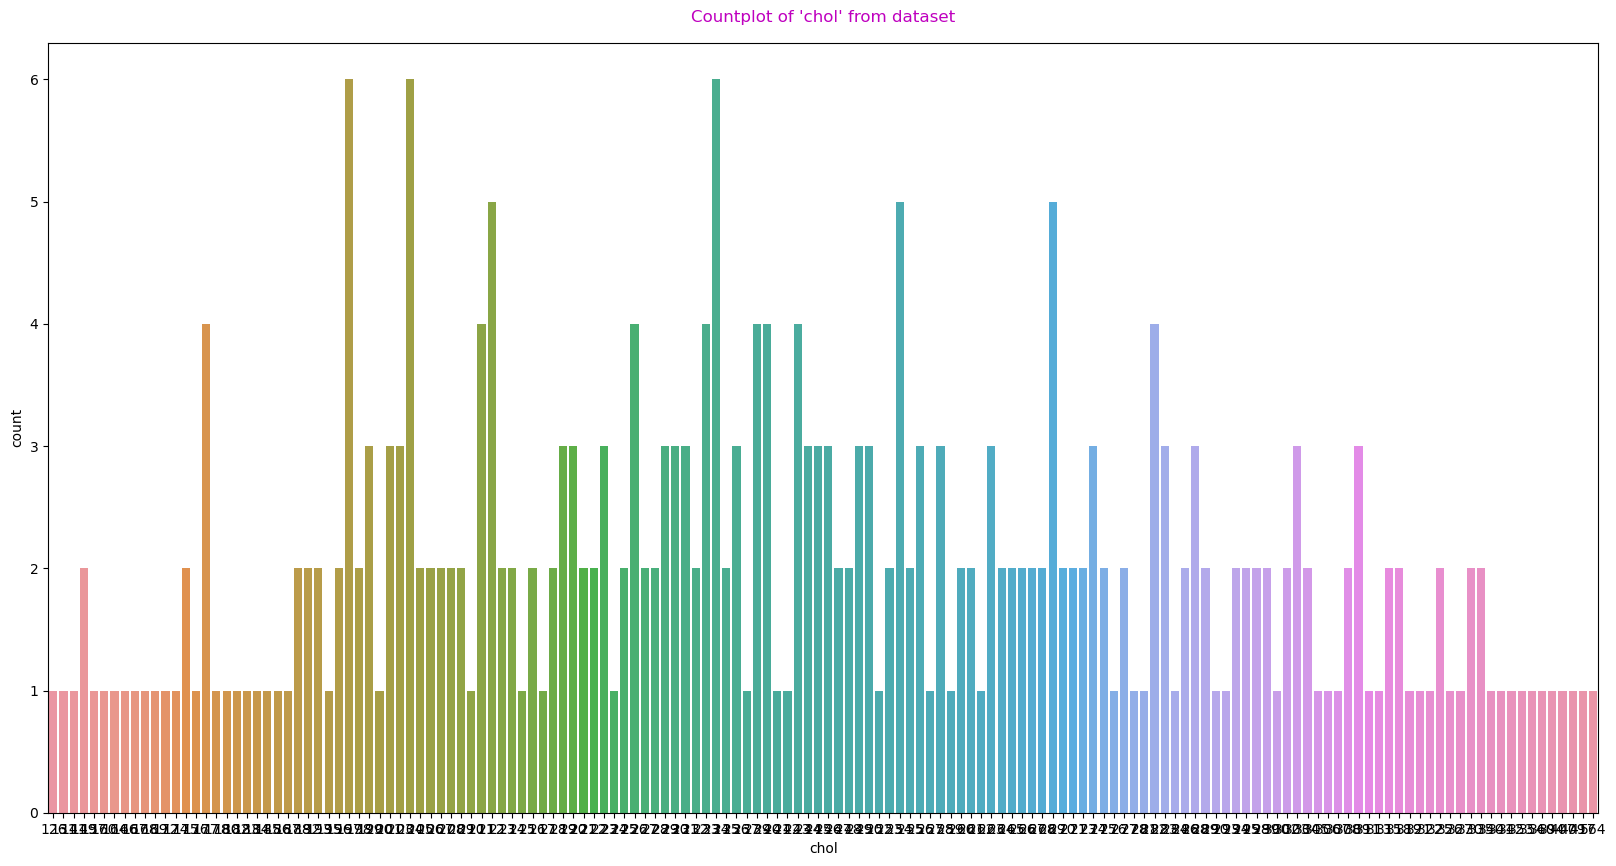

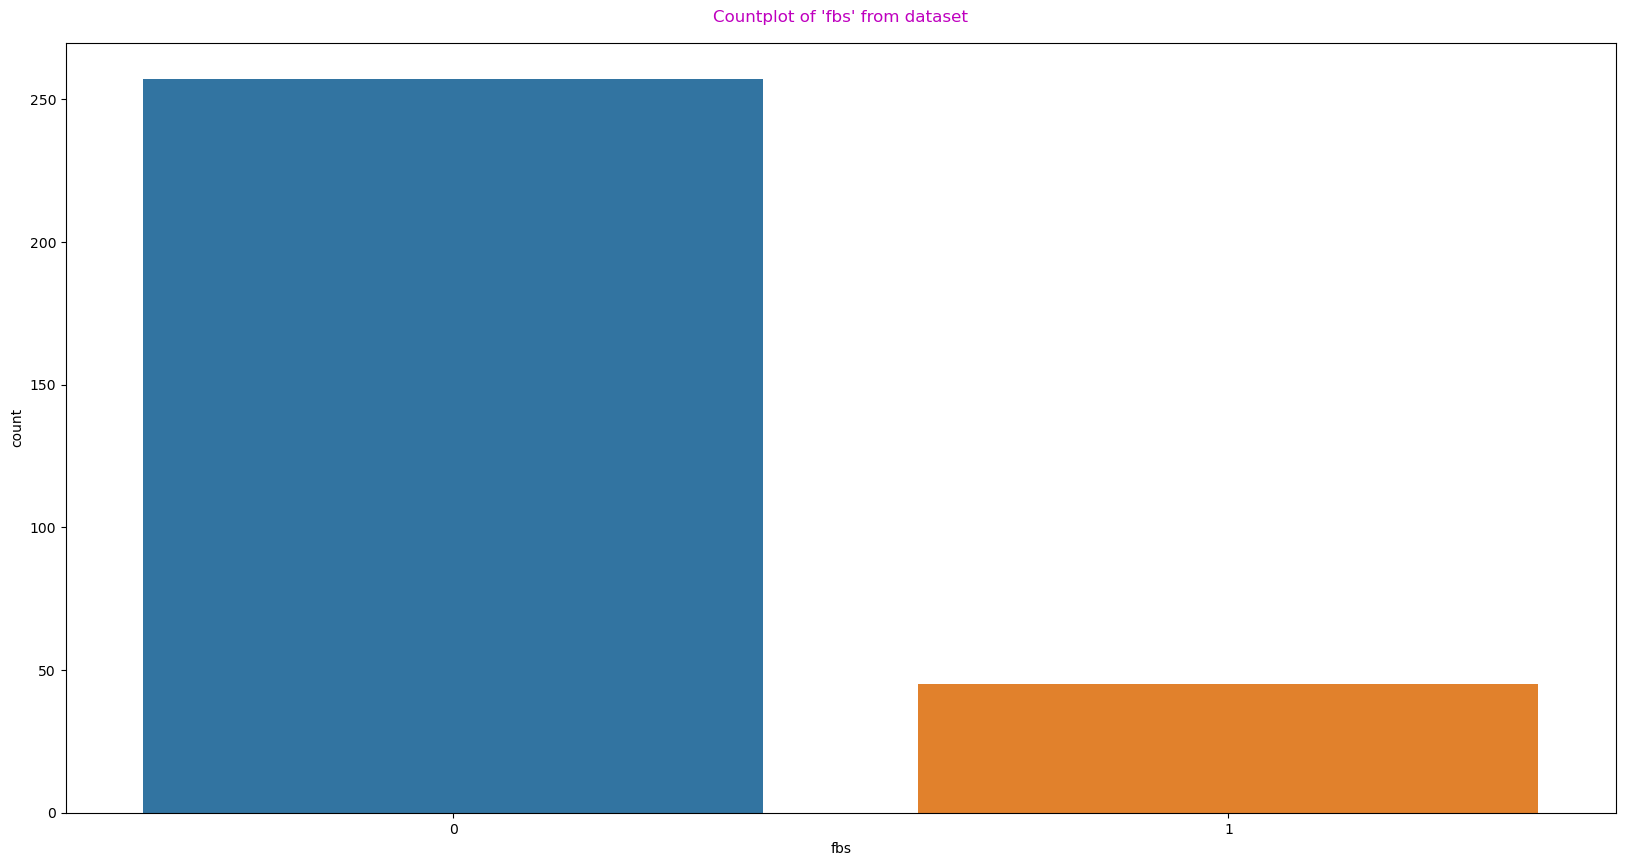

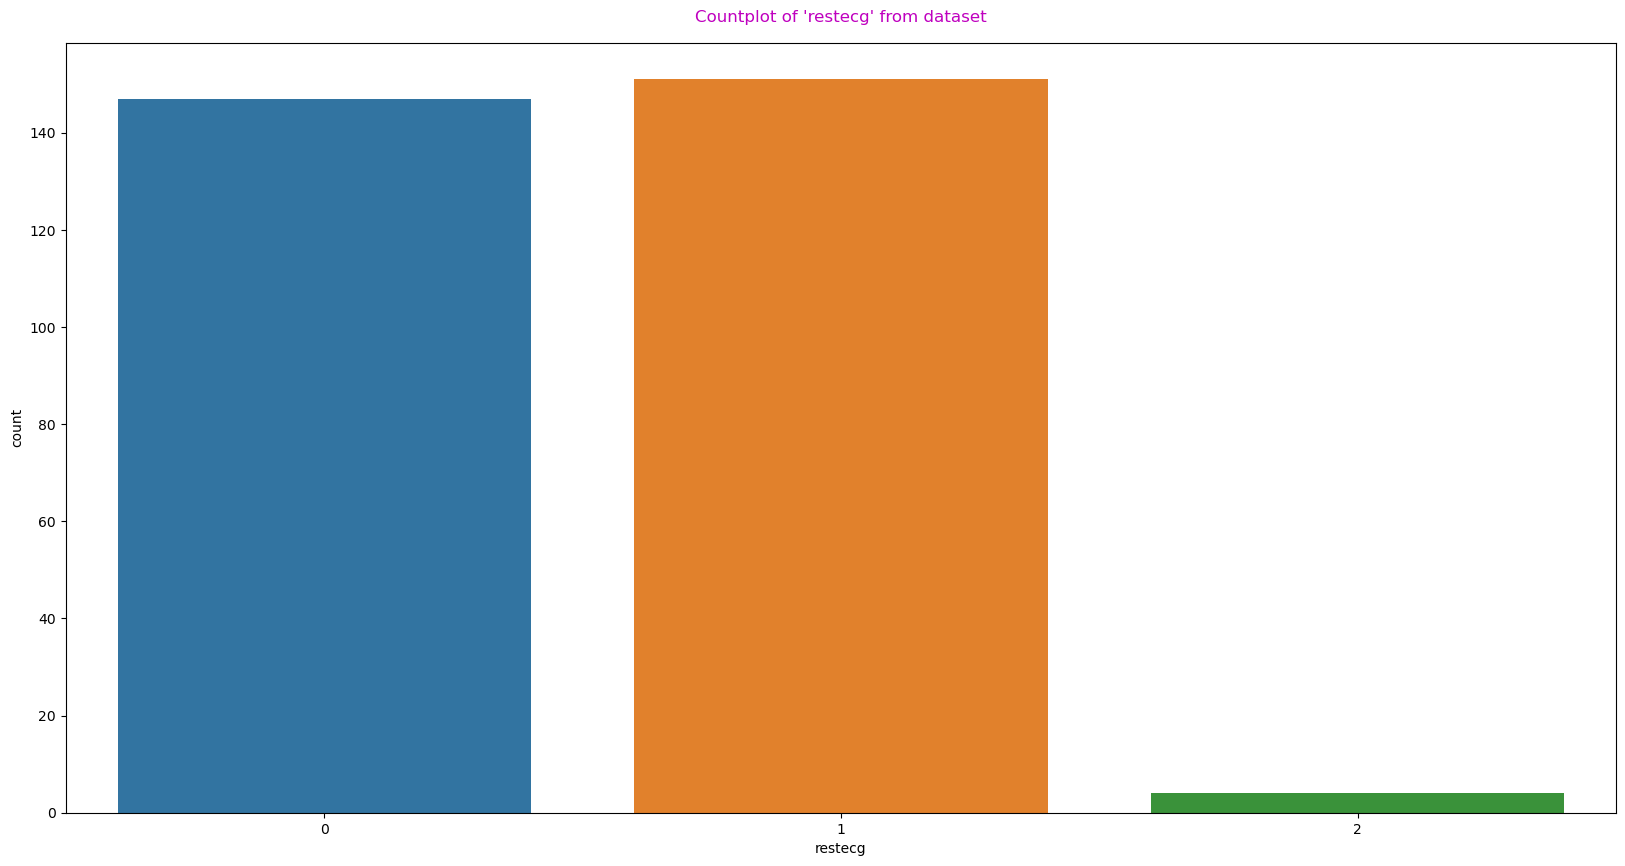

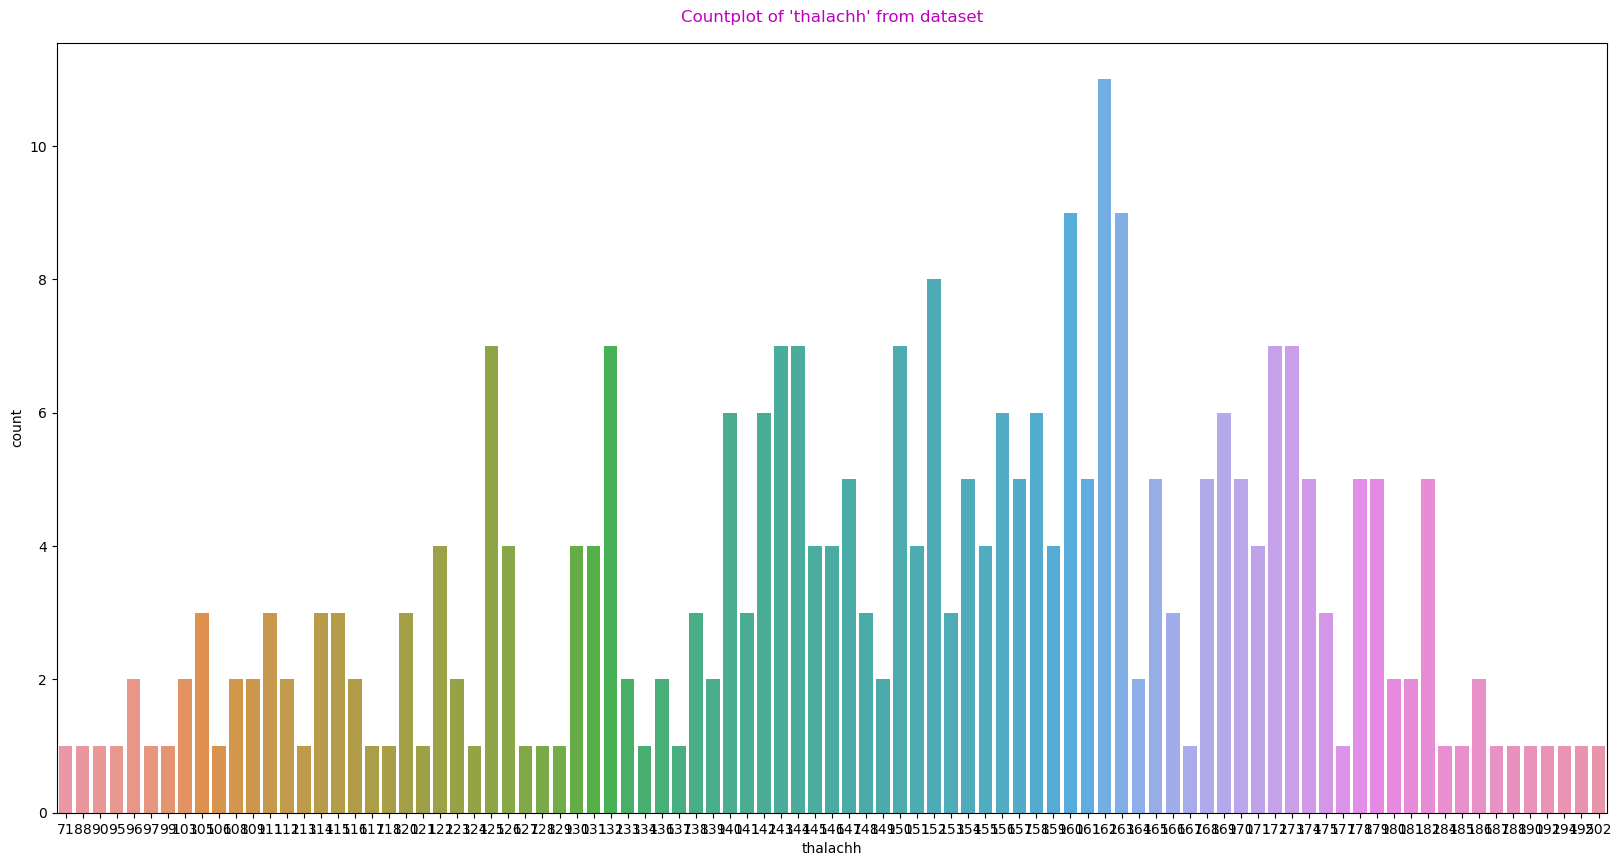

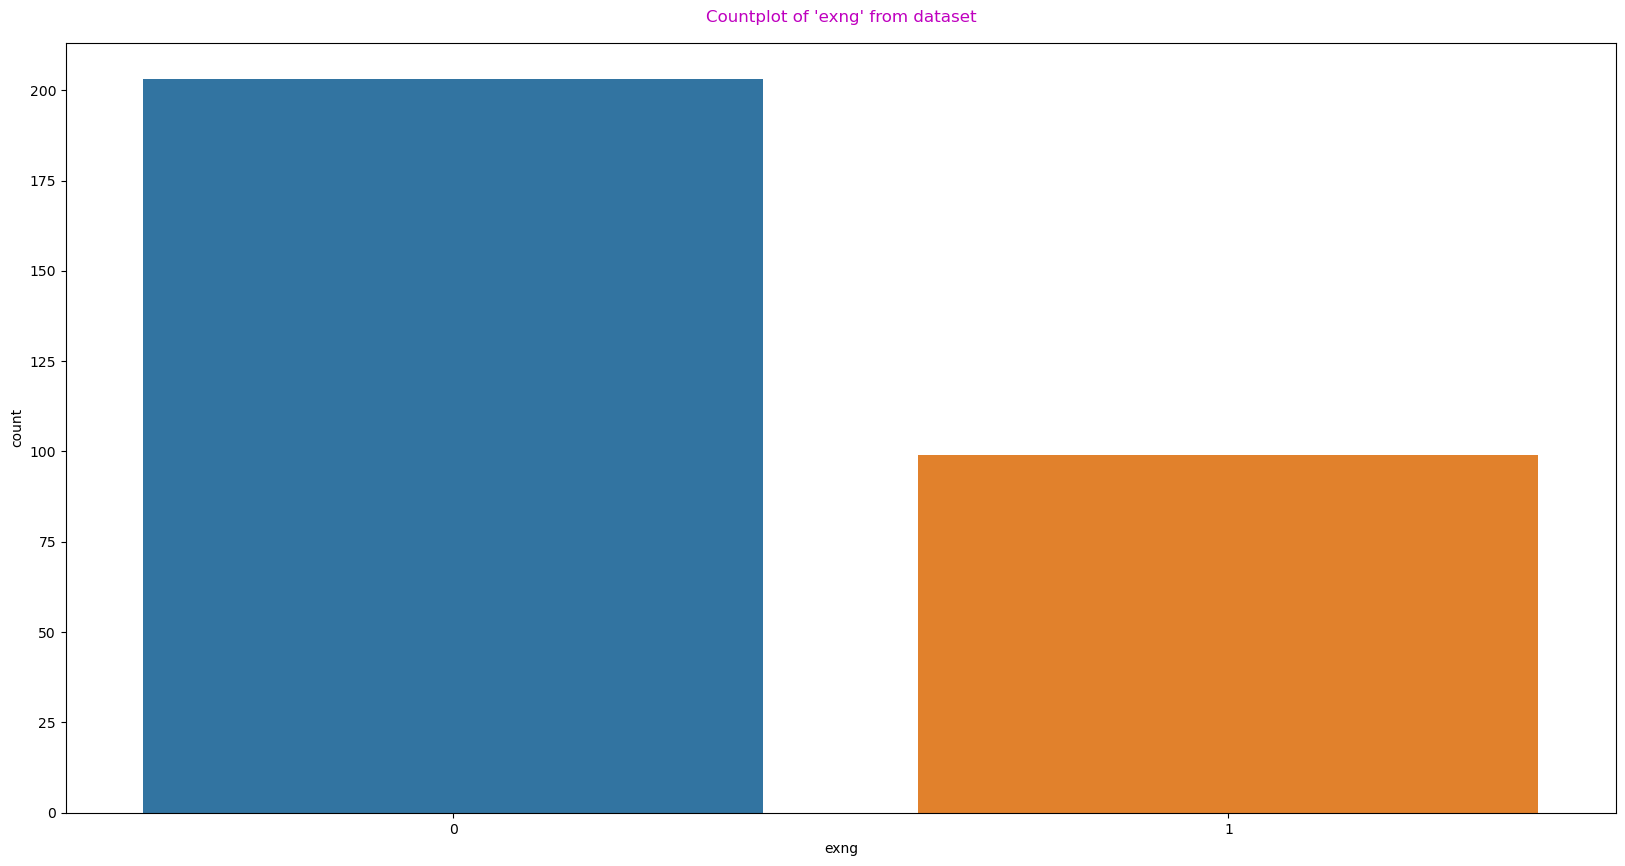

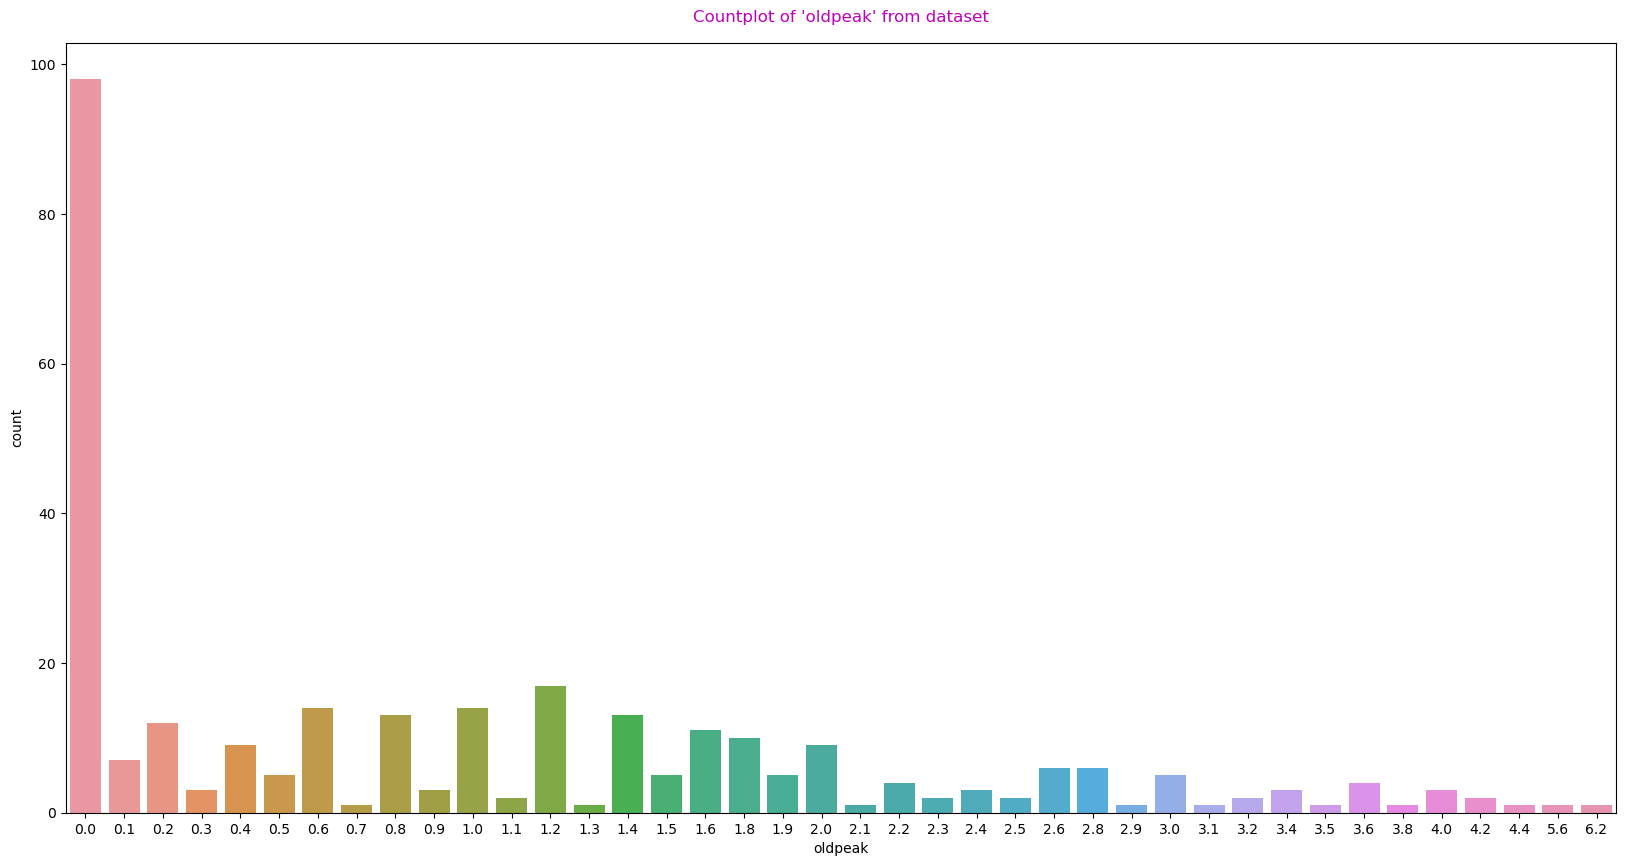

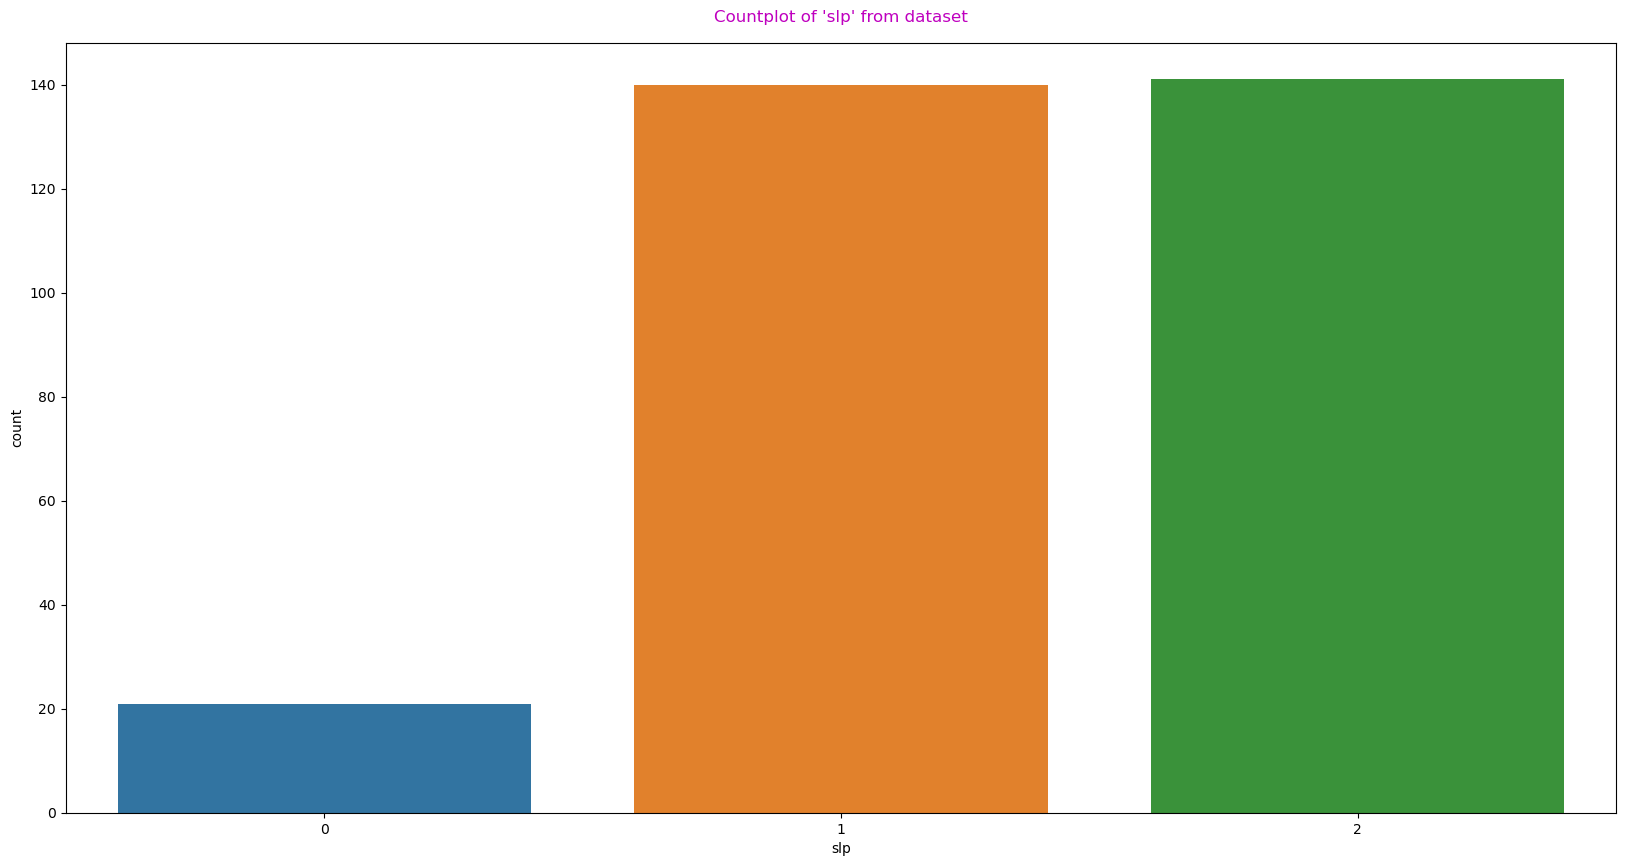

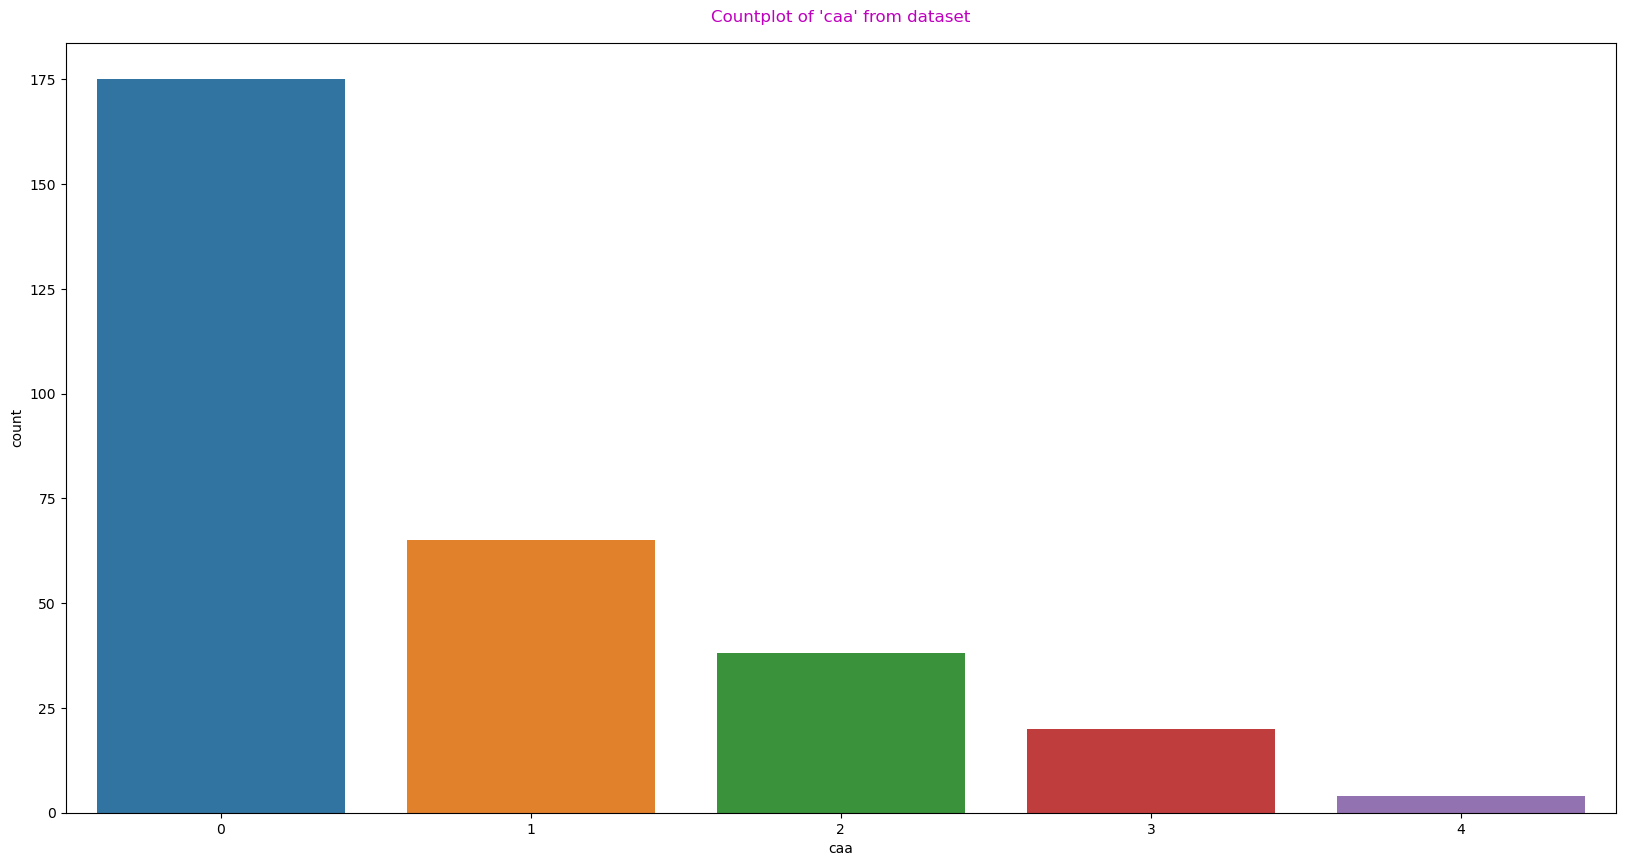

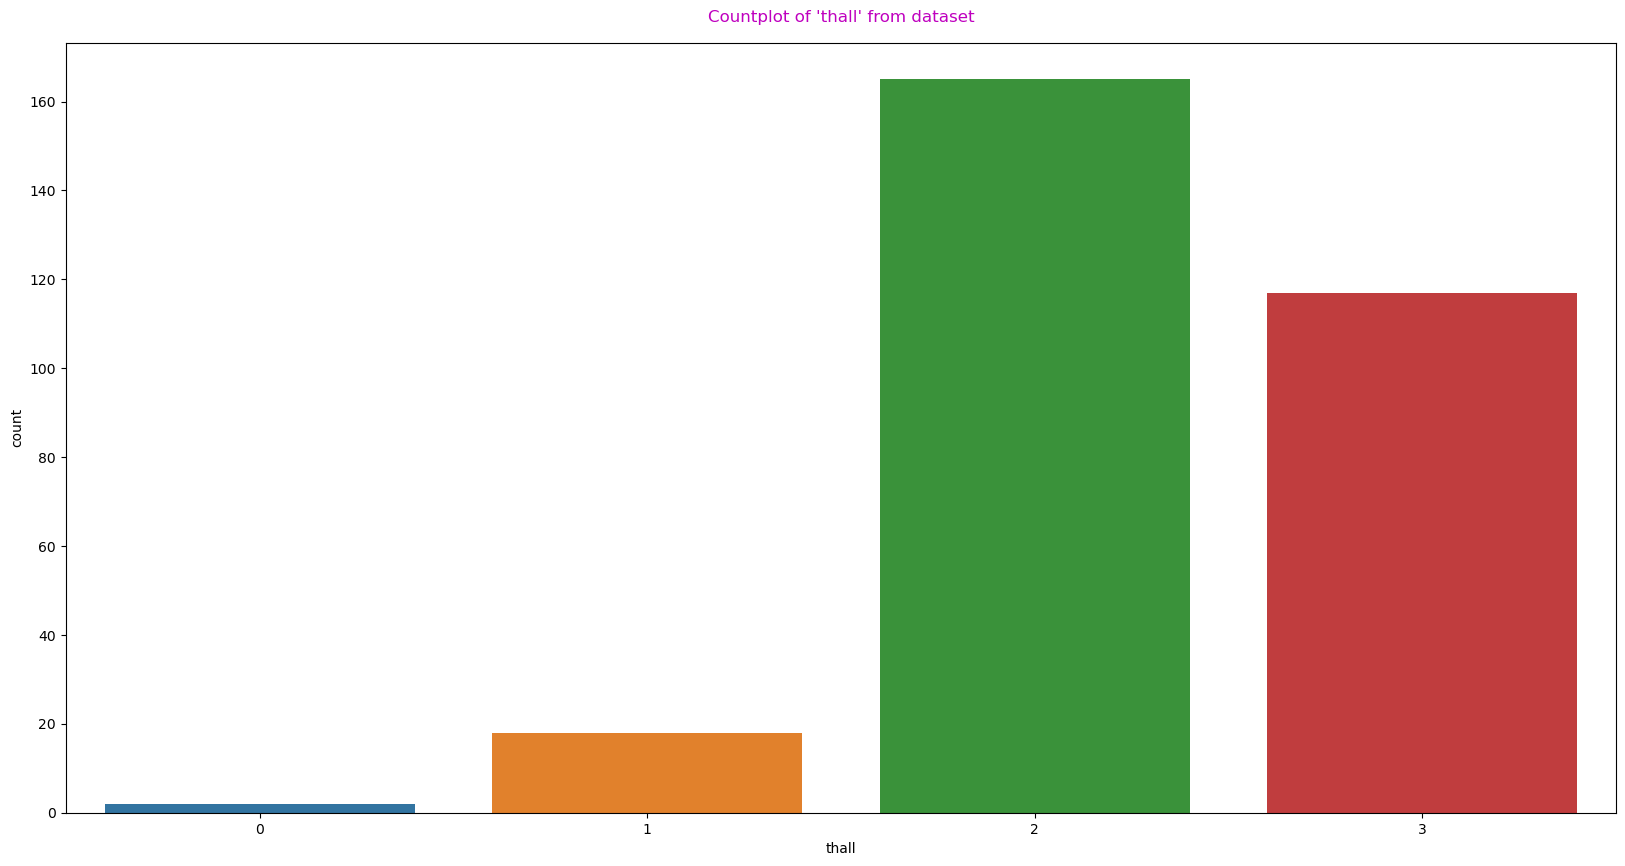

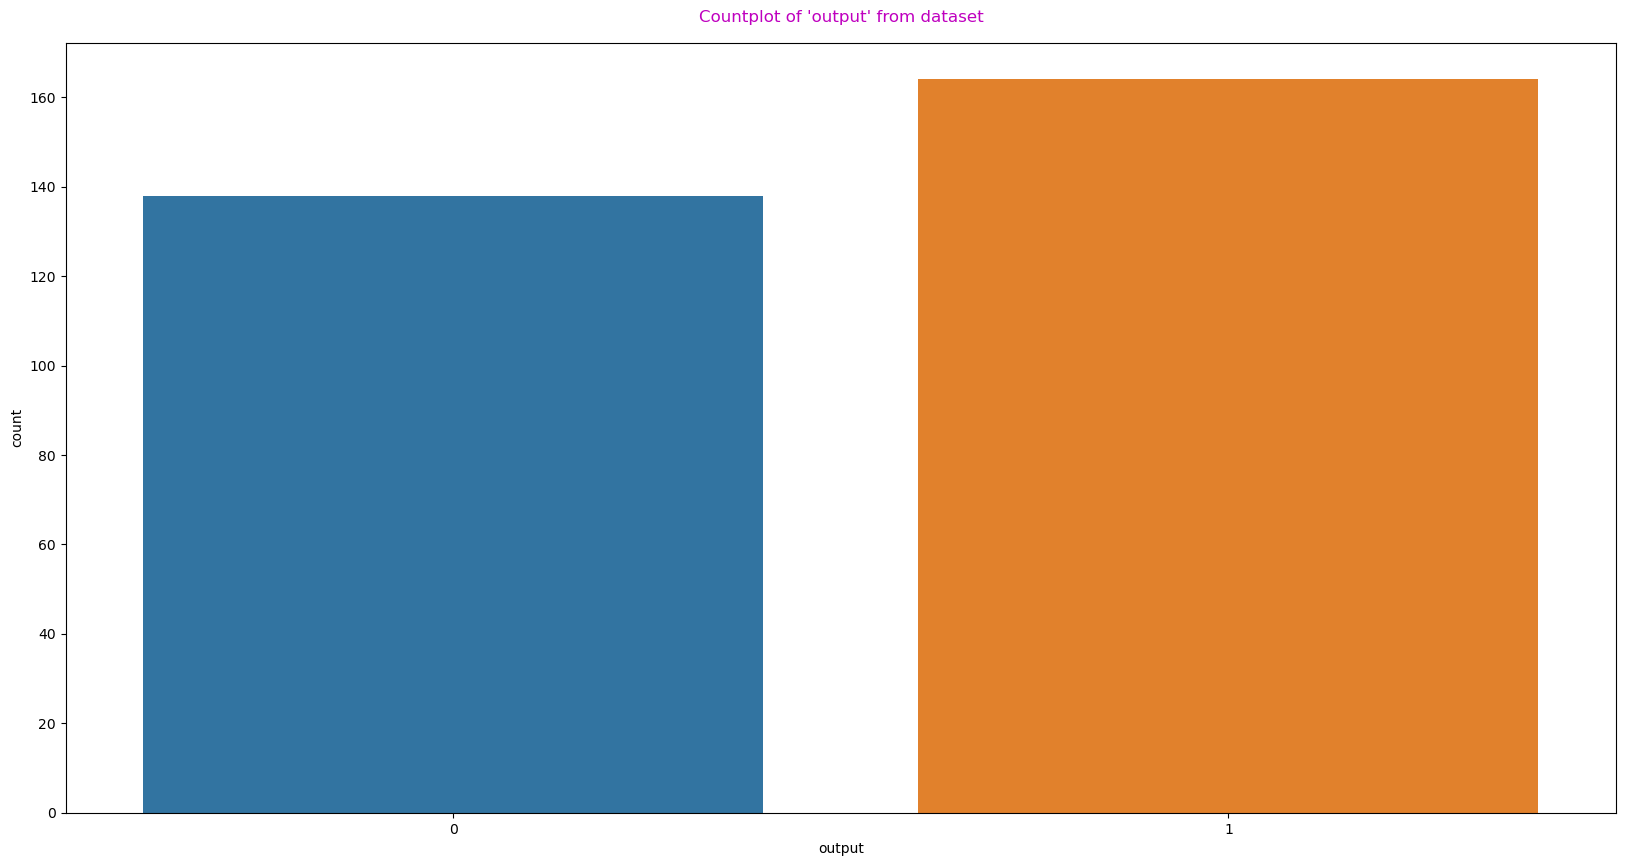

In [9]:

for feature in data.columns:
    plt.figure(figsize = (20,10)) # plt.figure(figsize = (Width,Height))
    sns.countplot(data = data, x = feature)
    plt.title(f"Countplot of '{feature}' from dataset", pad = 15, c = 'm')
    plt.show()

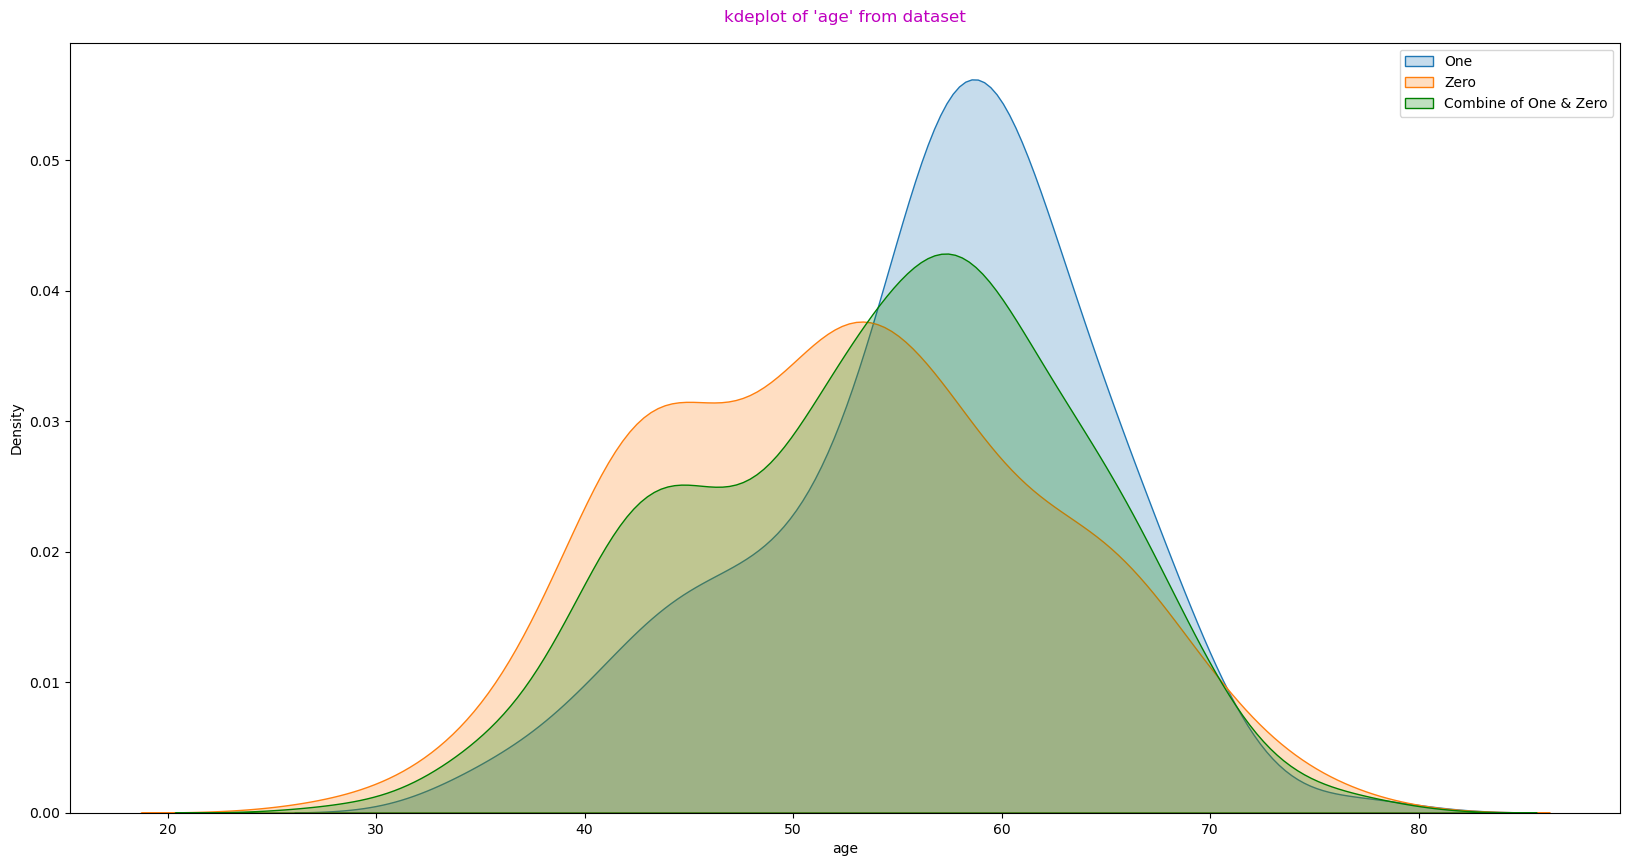

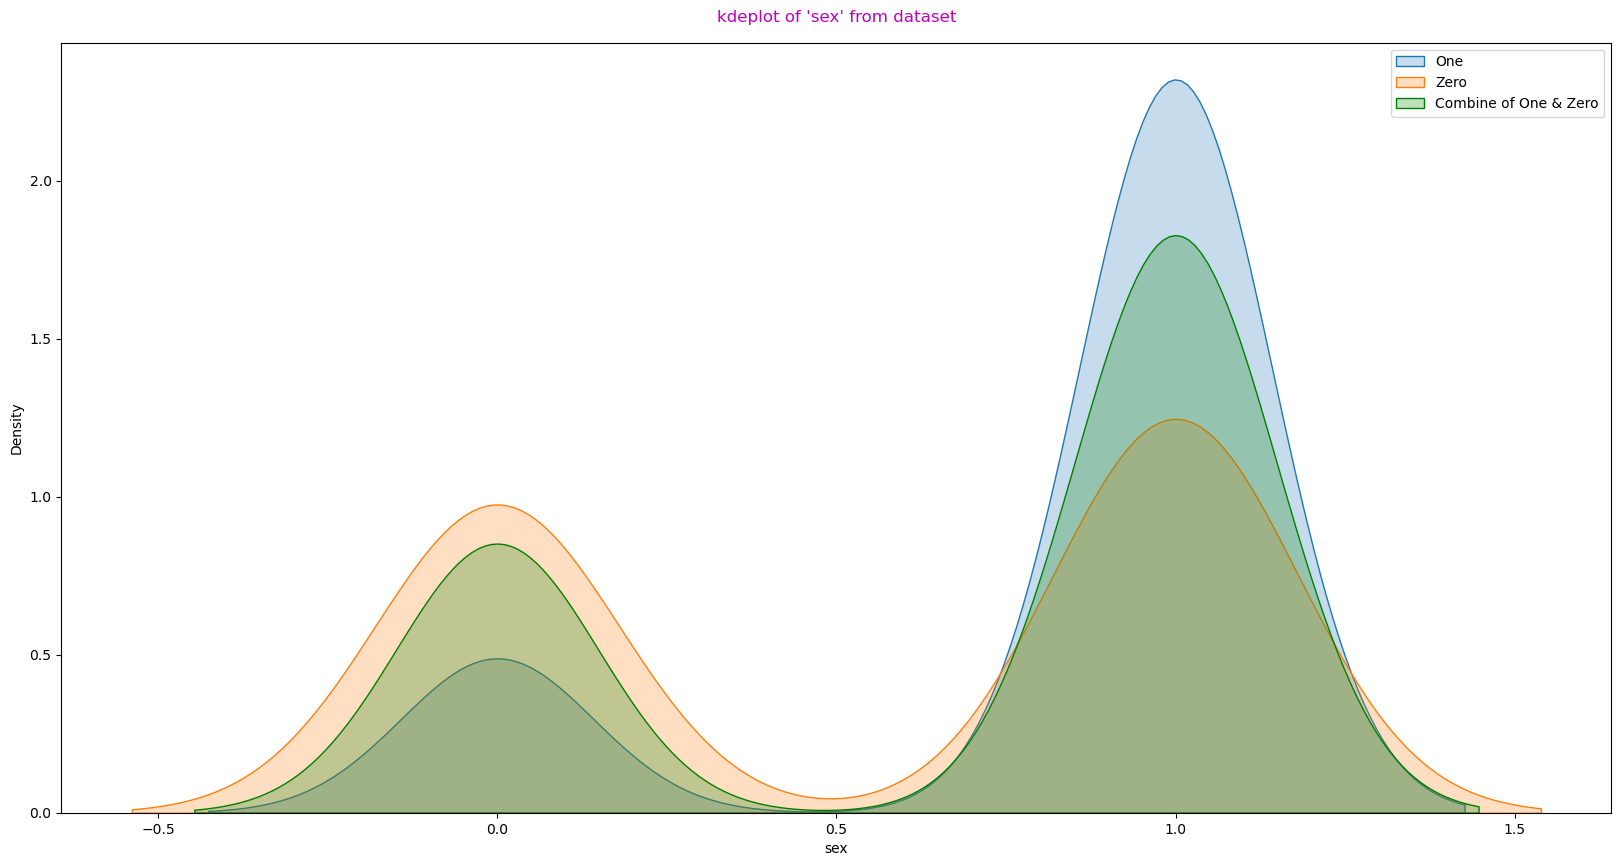

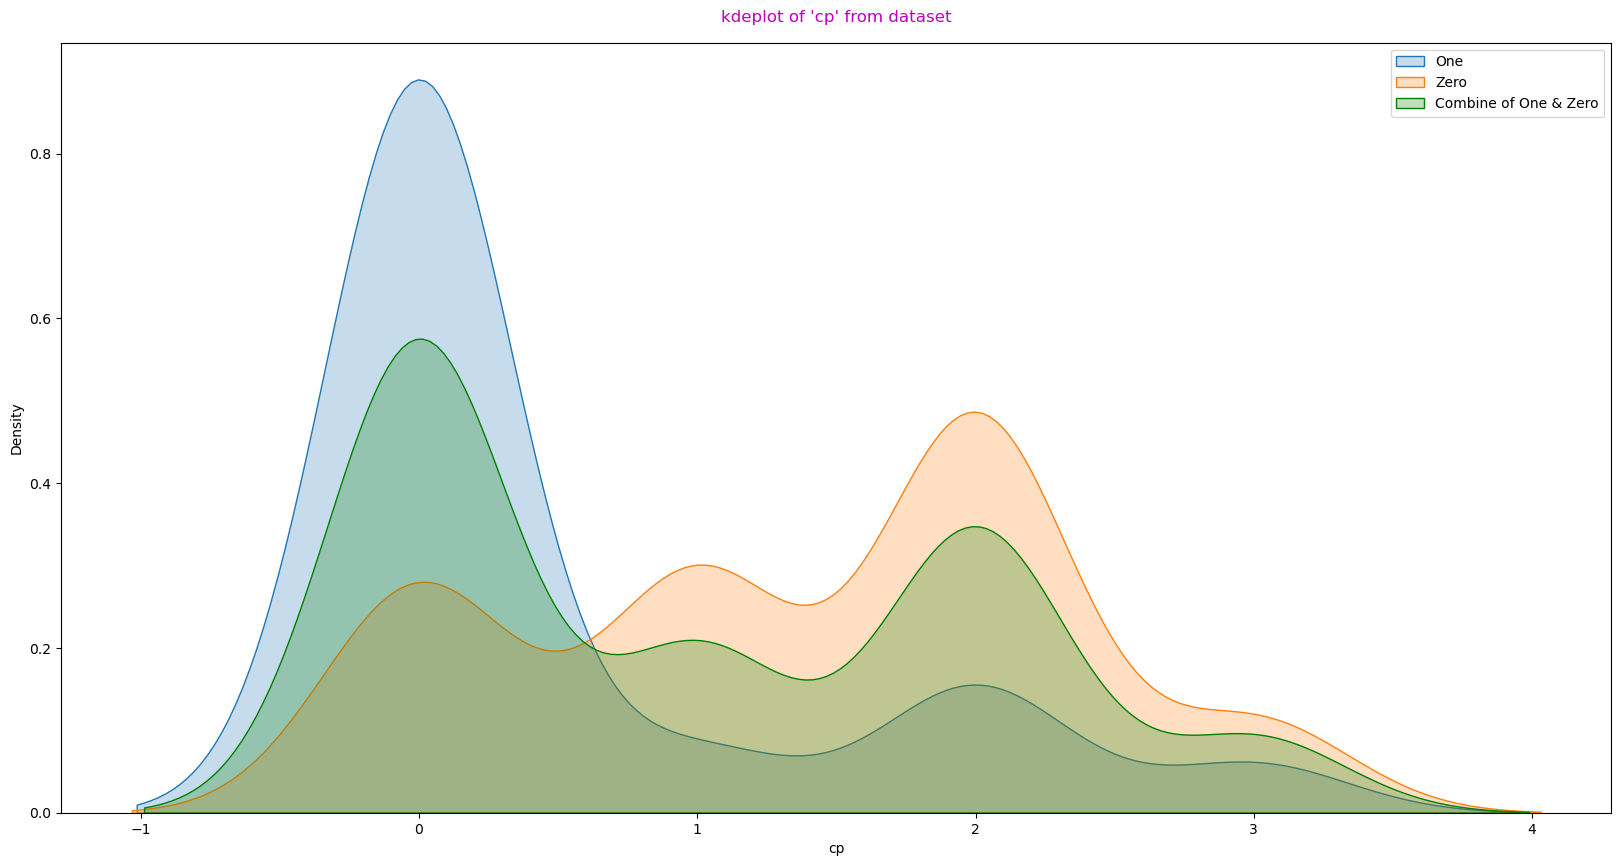

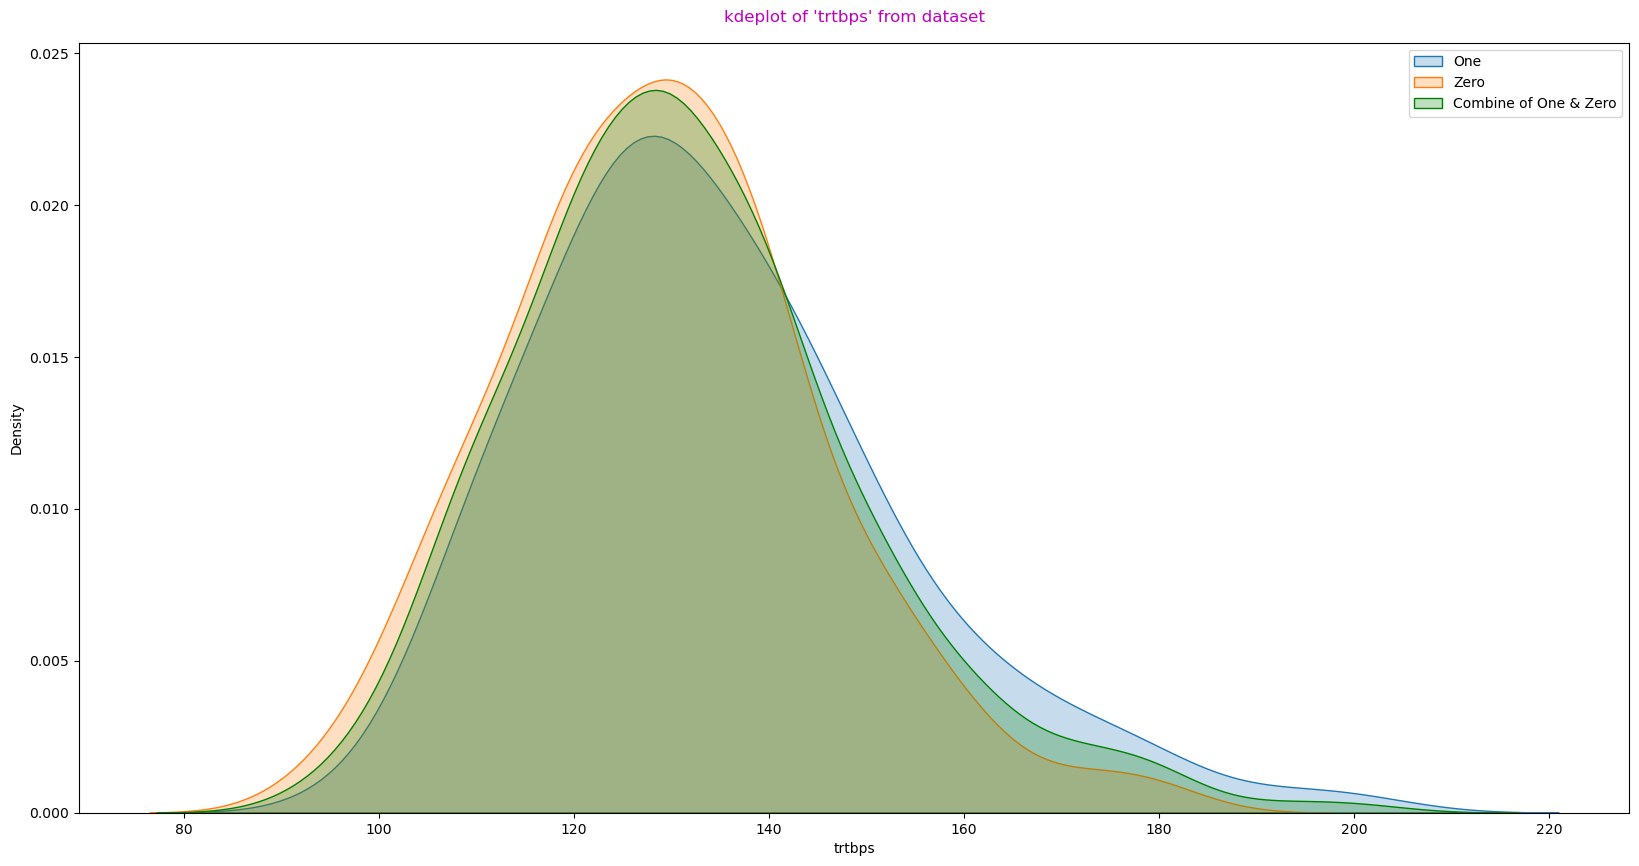

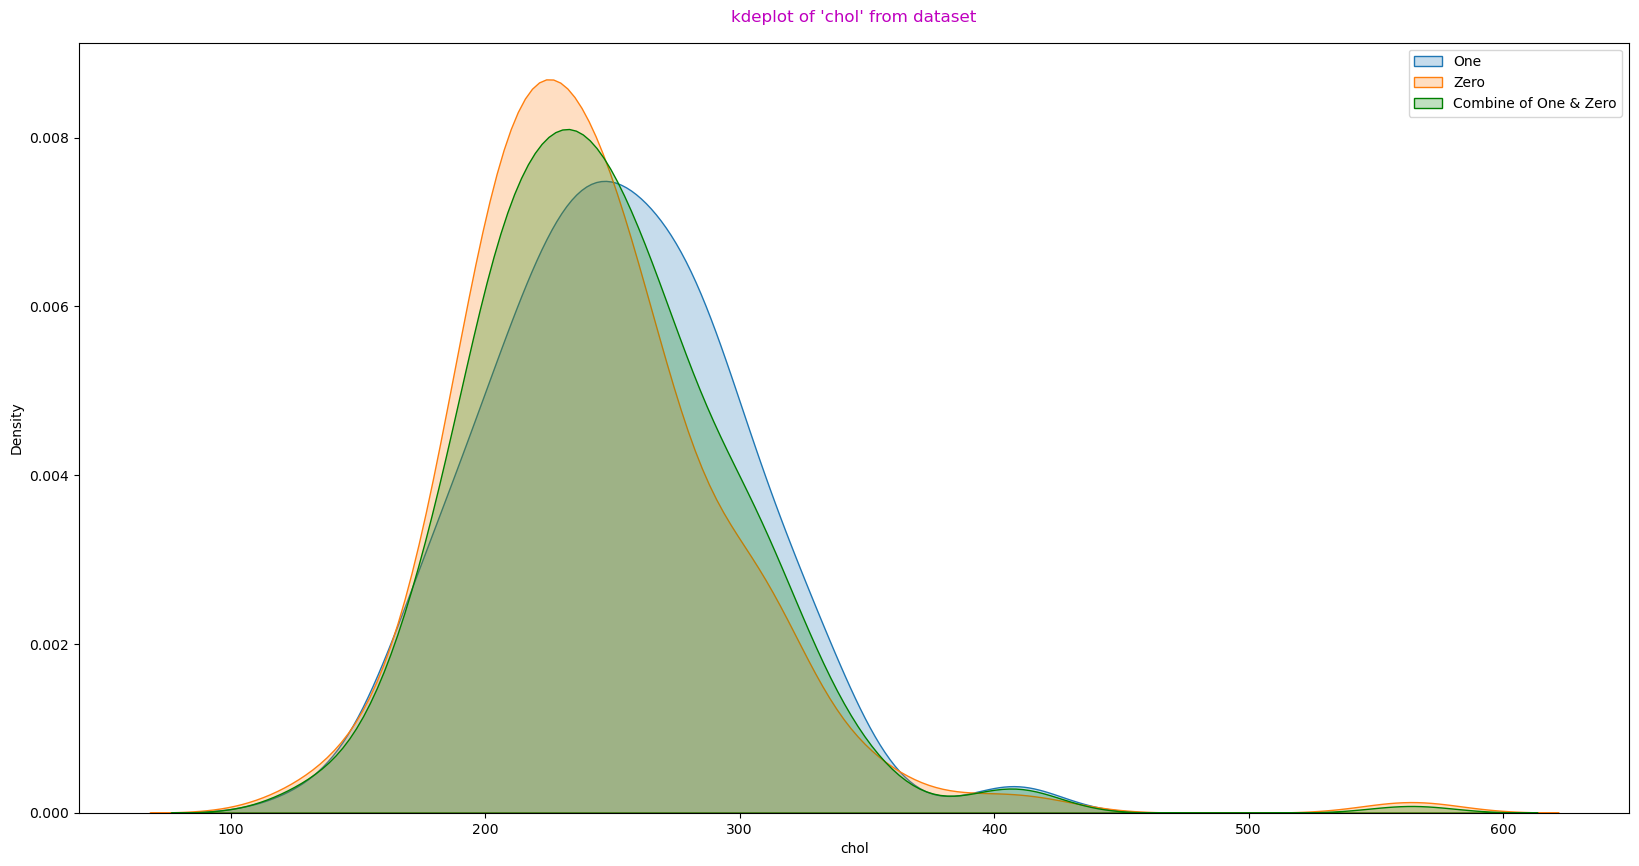

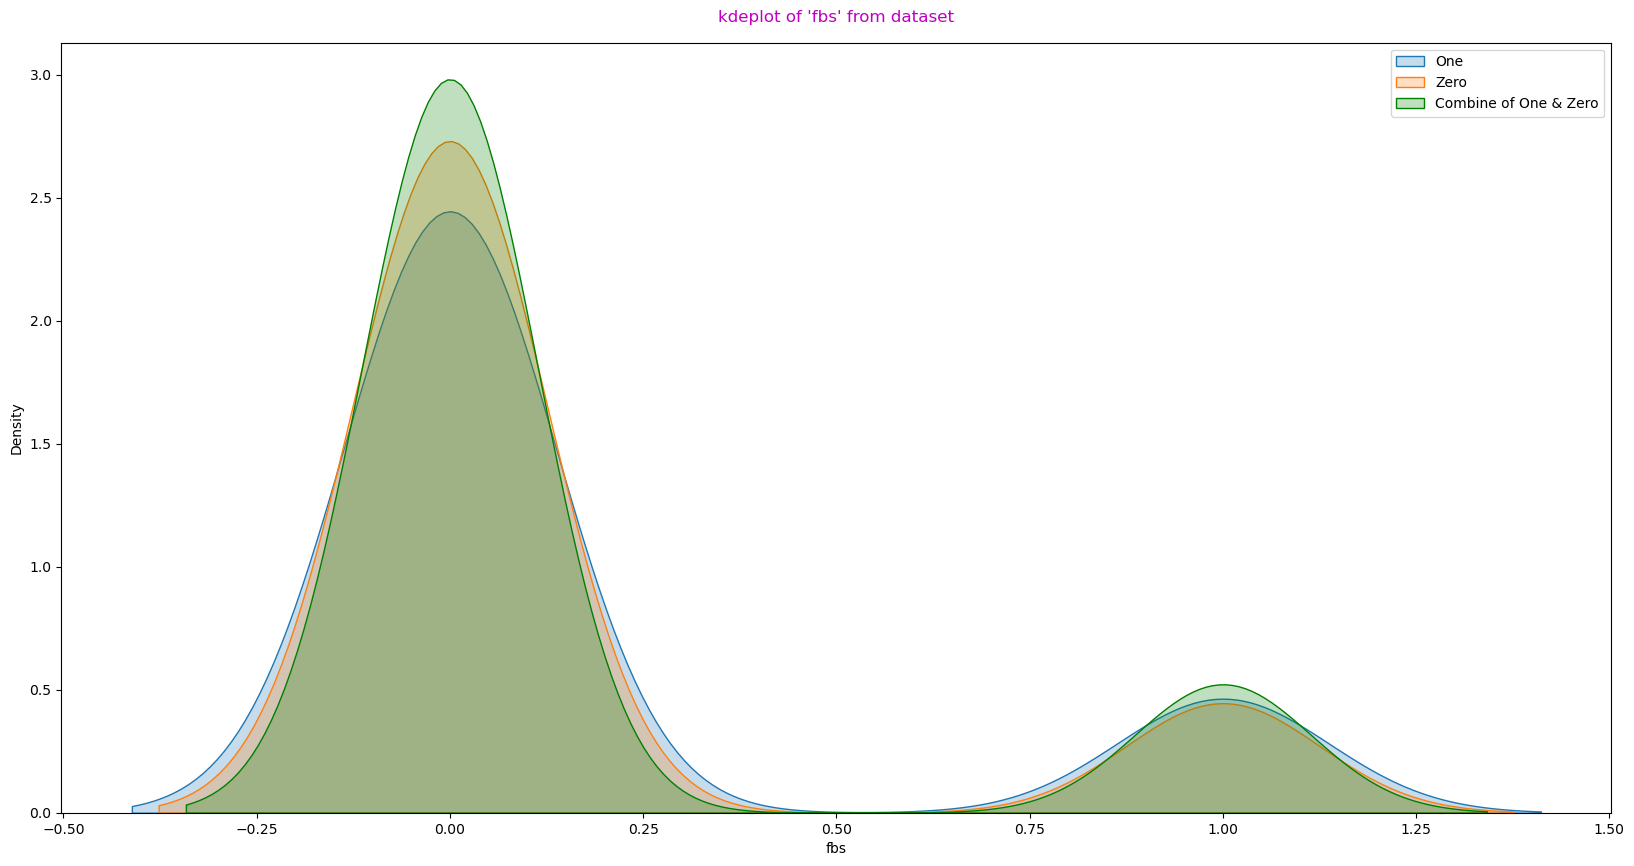

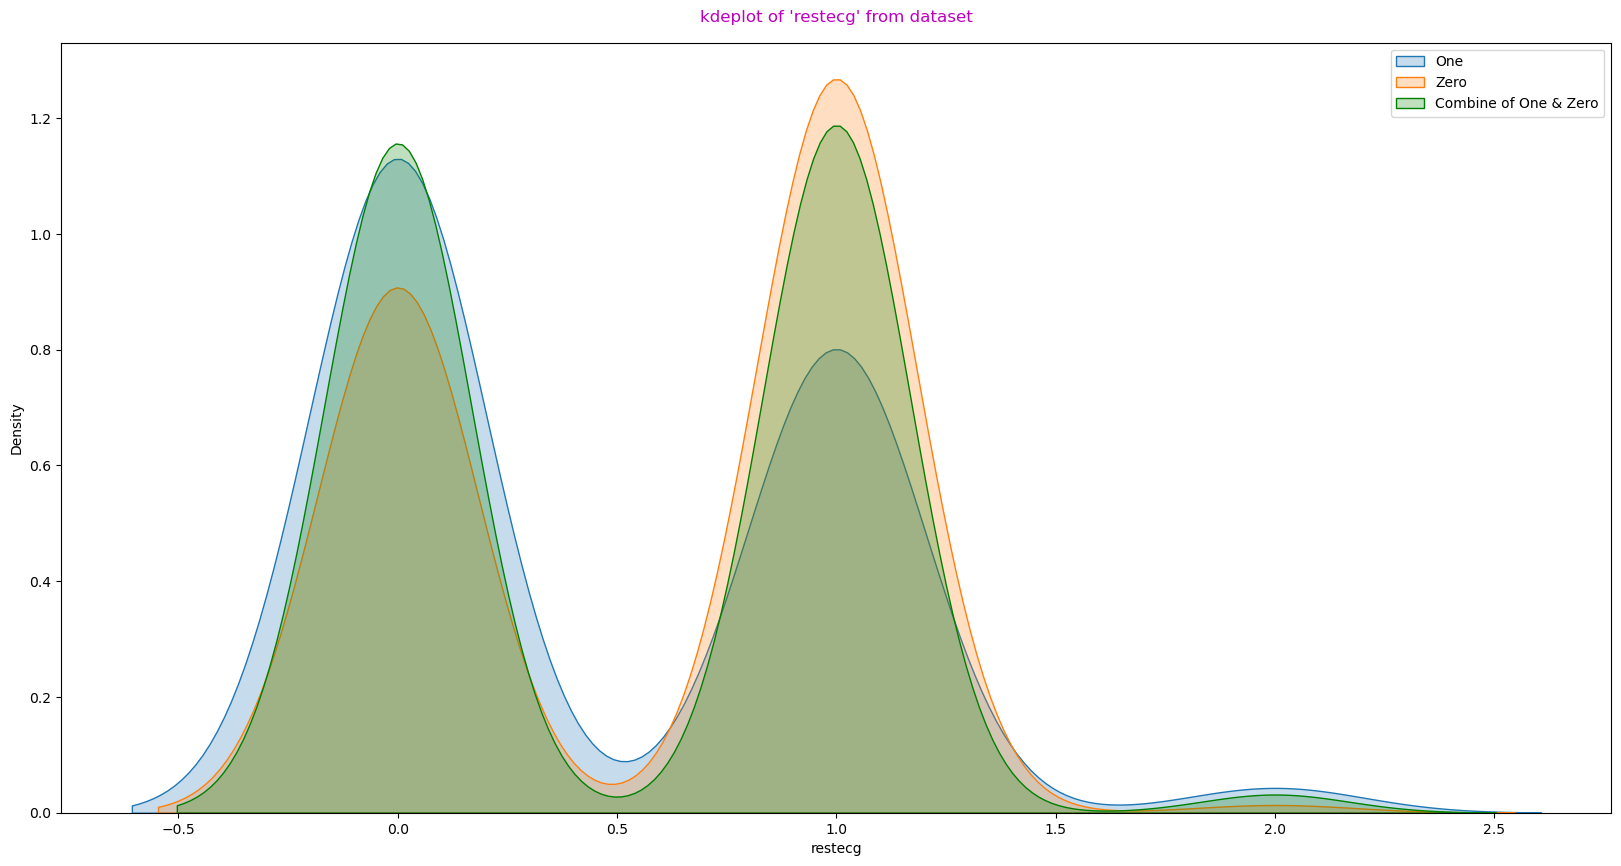

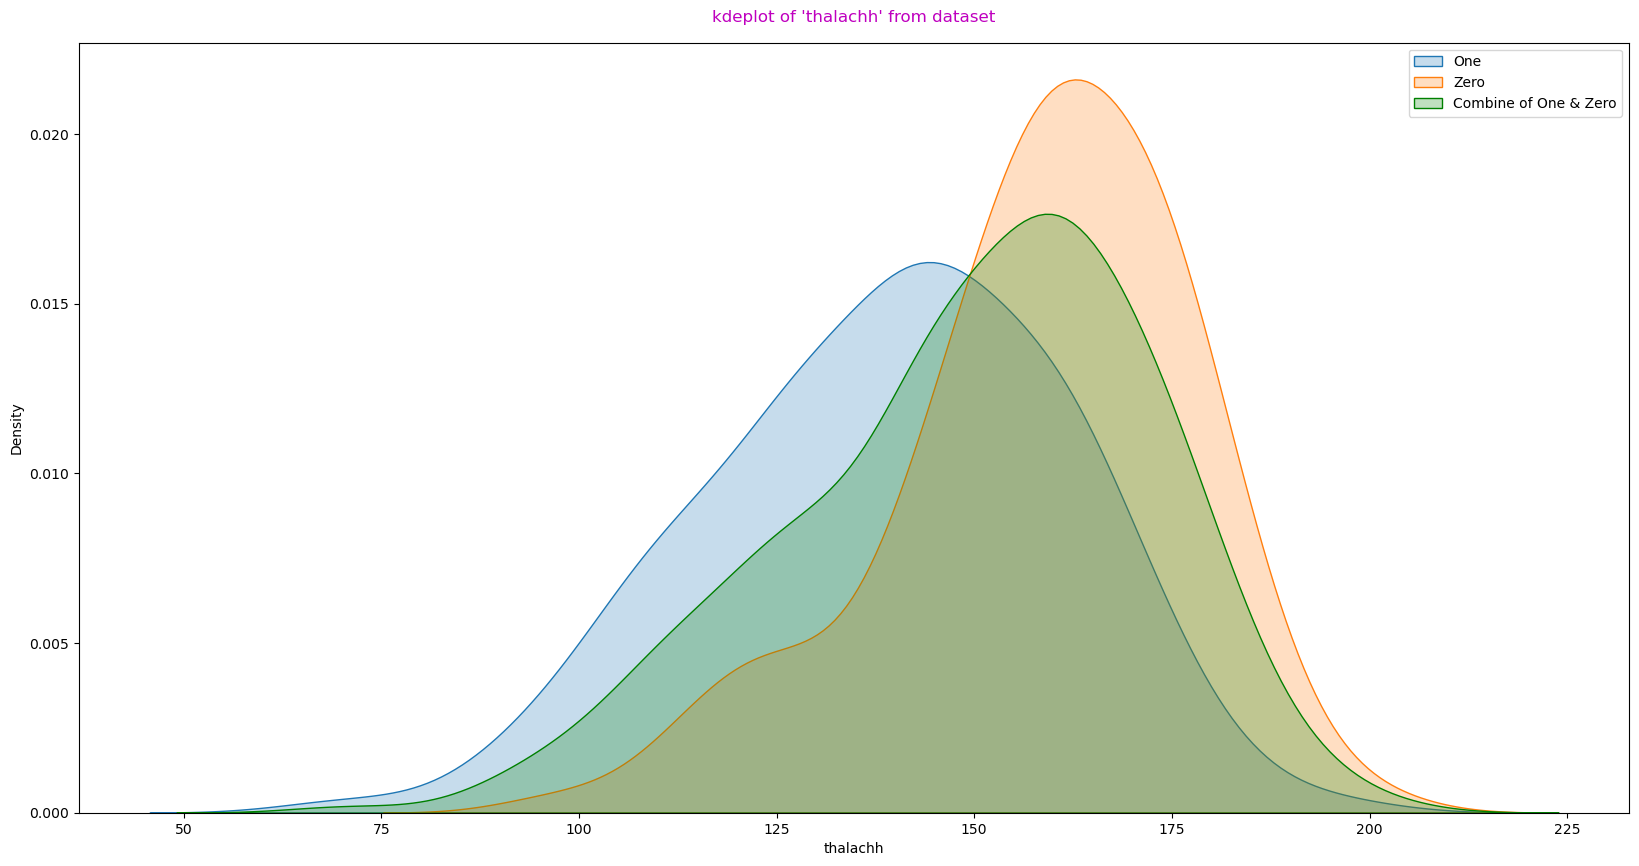

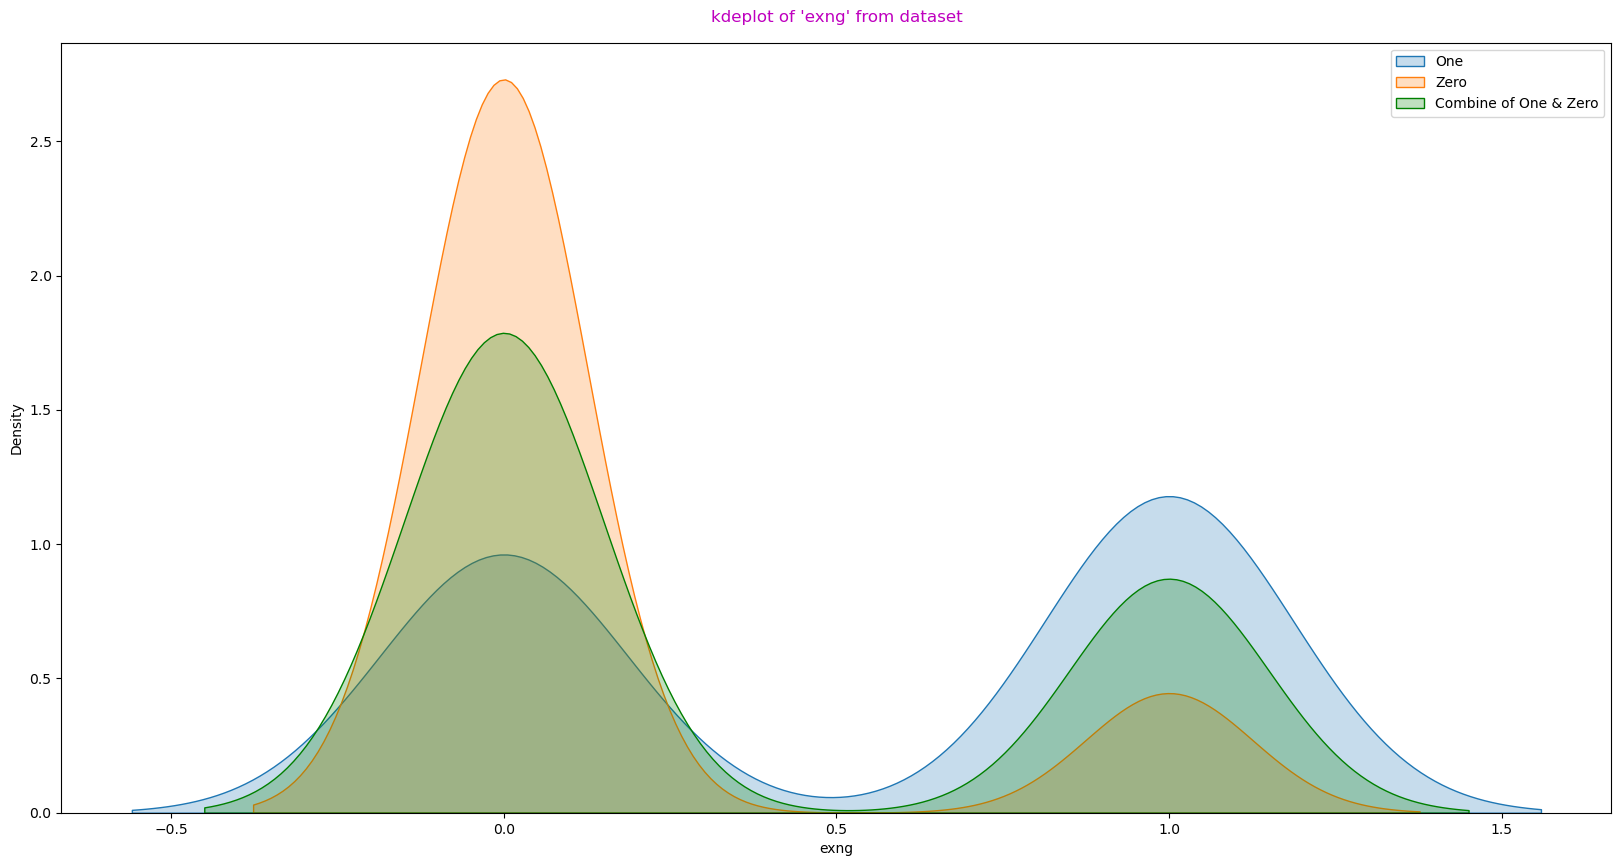

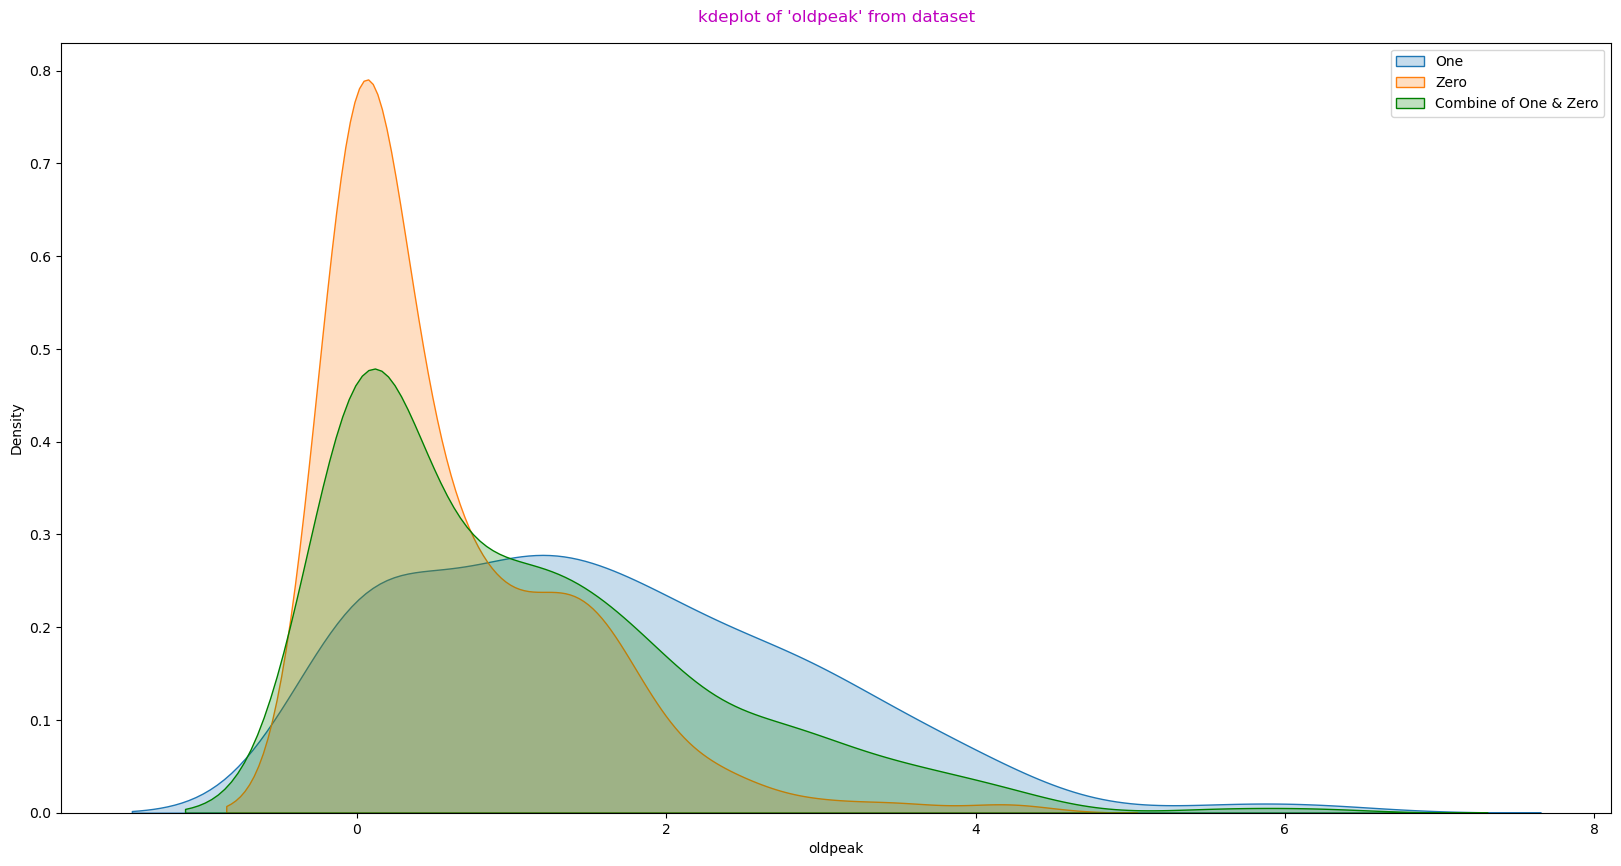

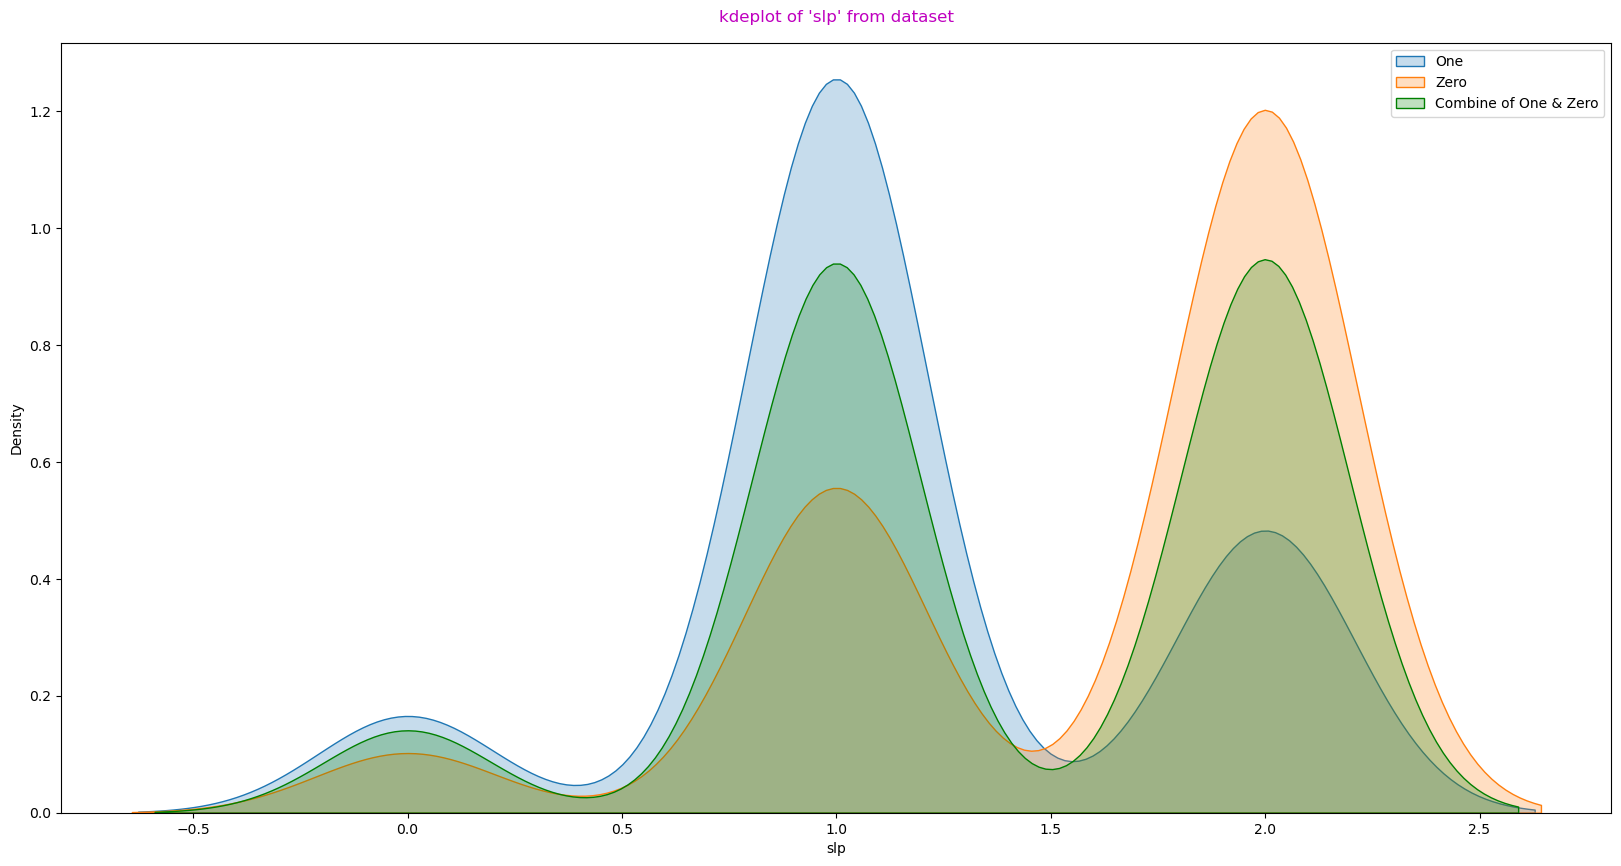

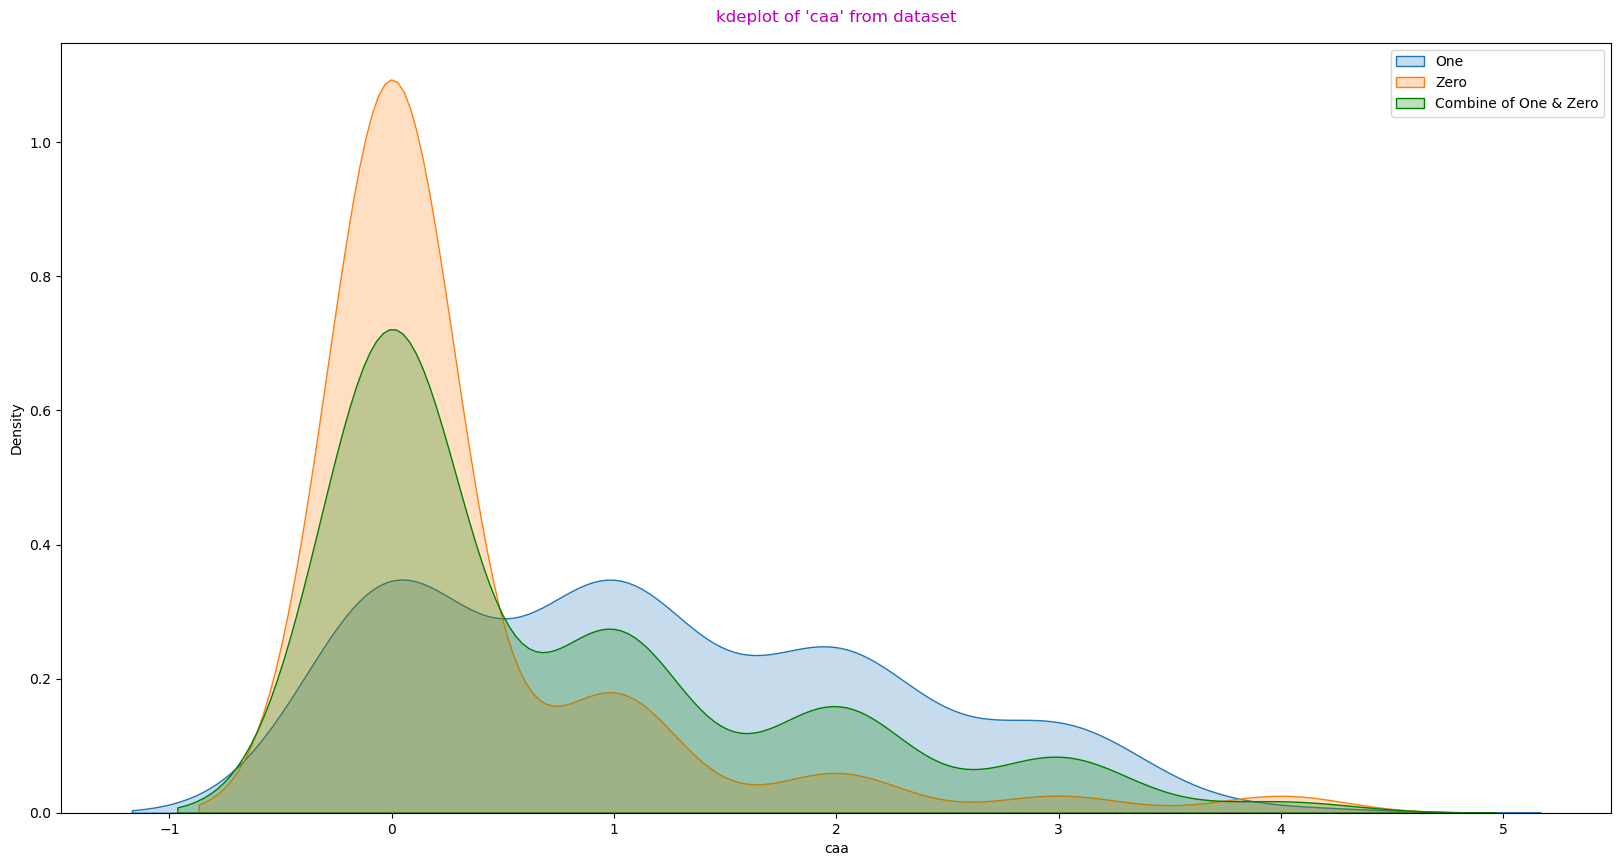

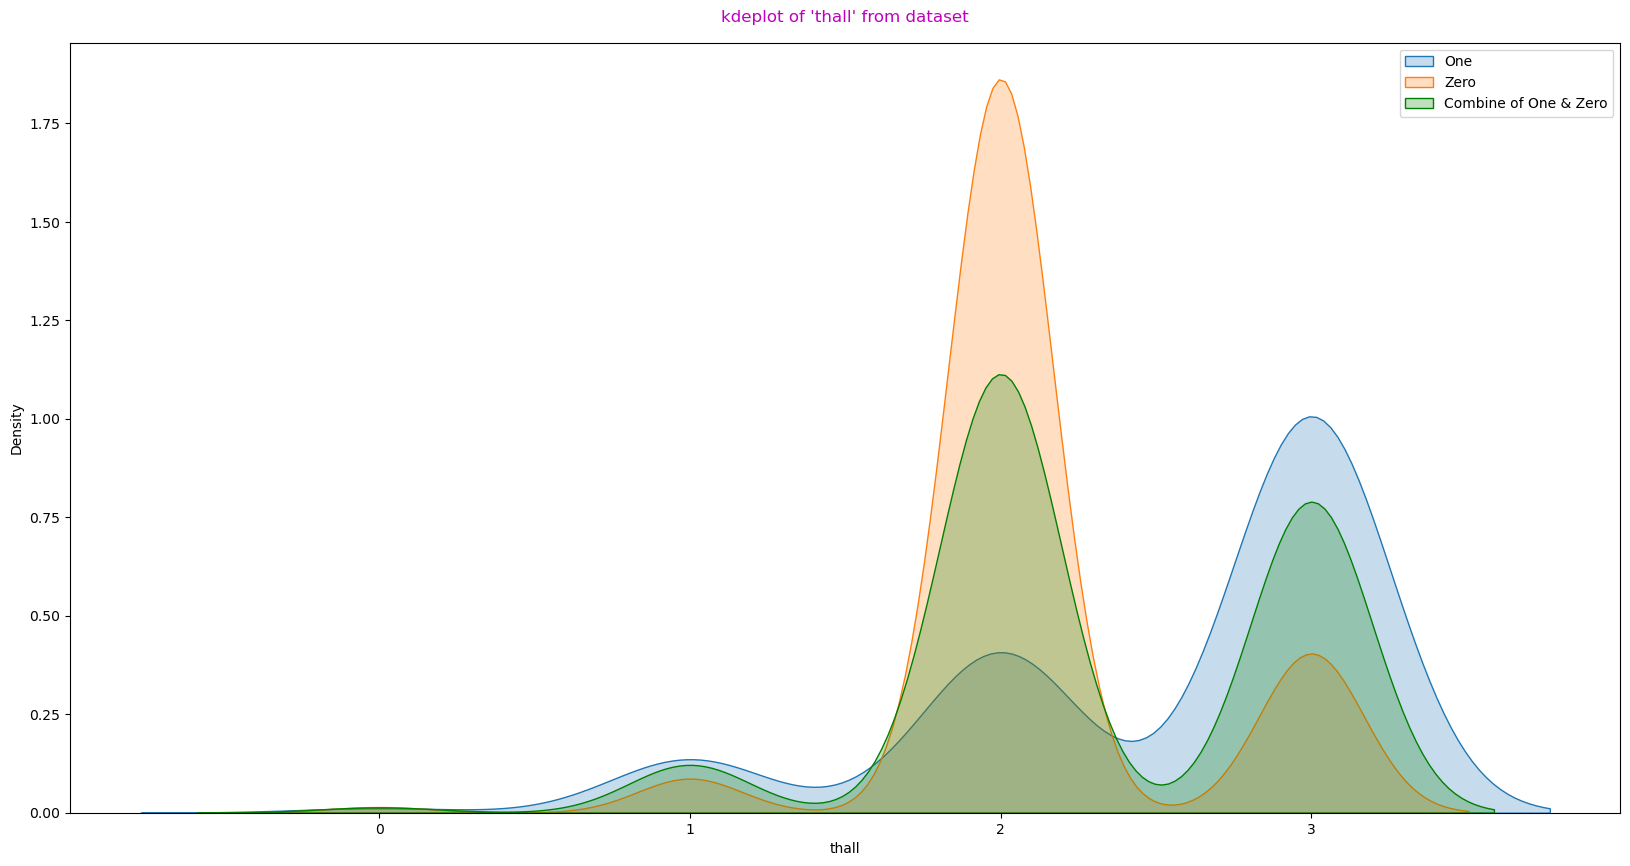

C:\Users\Admin\AppData\Local\Temp\ipykernel_6668\1240889567.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data.output == 0][feature], label = 'One', fill = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6668\1240889567.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data.output == 1][feature], label = 'Zero', fill = True)


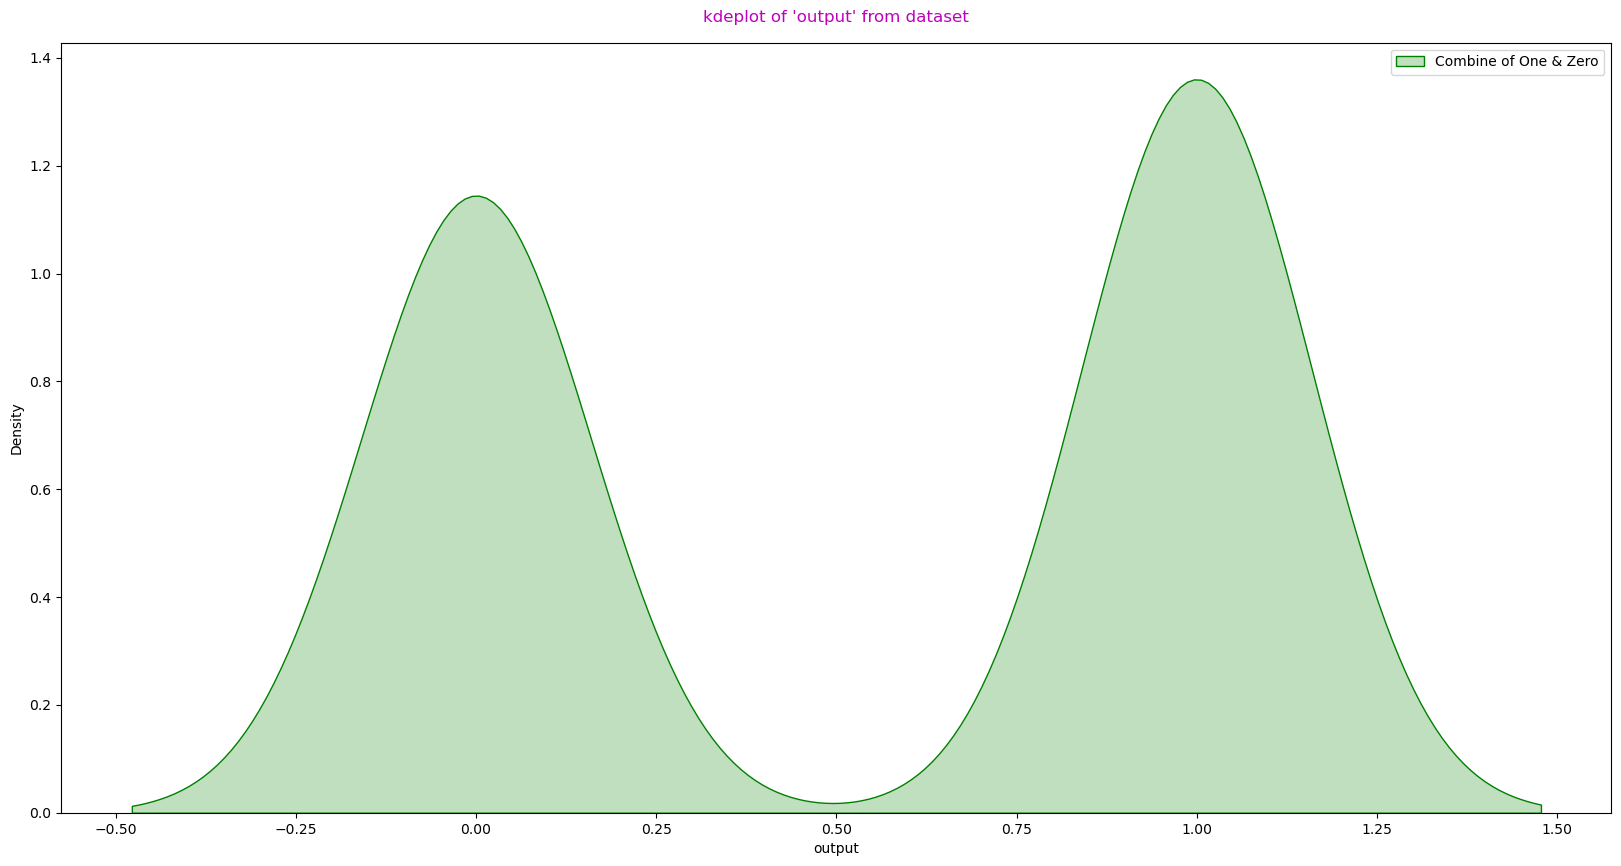

In [10]:

for feature in data.columns:
    plt.figure(figsize = (20,10)) # plt.figure(figsize = (Width,Height))
    sns.kdeplot(data[data.output == 0][feature], label = 'One', fill = True)
    sns.kdeplot(data[data.output == 1][feature], label = 'Zero', fill = True)
    sns.kdeplot(data = data, x = feature, color = 'g',label = 'Combine of One & Zero', fill = True)
    plt.title(f"kdeplot of '{feature}' from dataset", pad = 15, c = 'm')
    plt.xlabel(feature)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


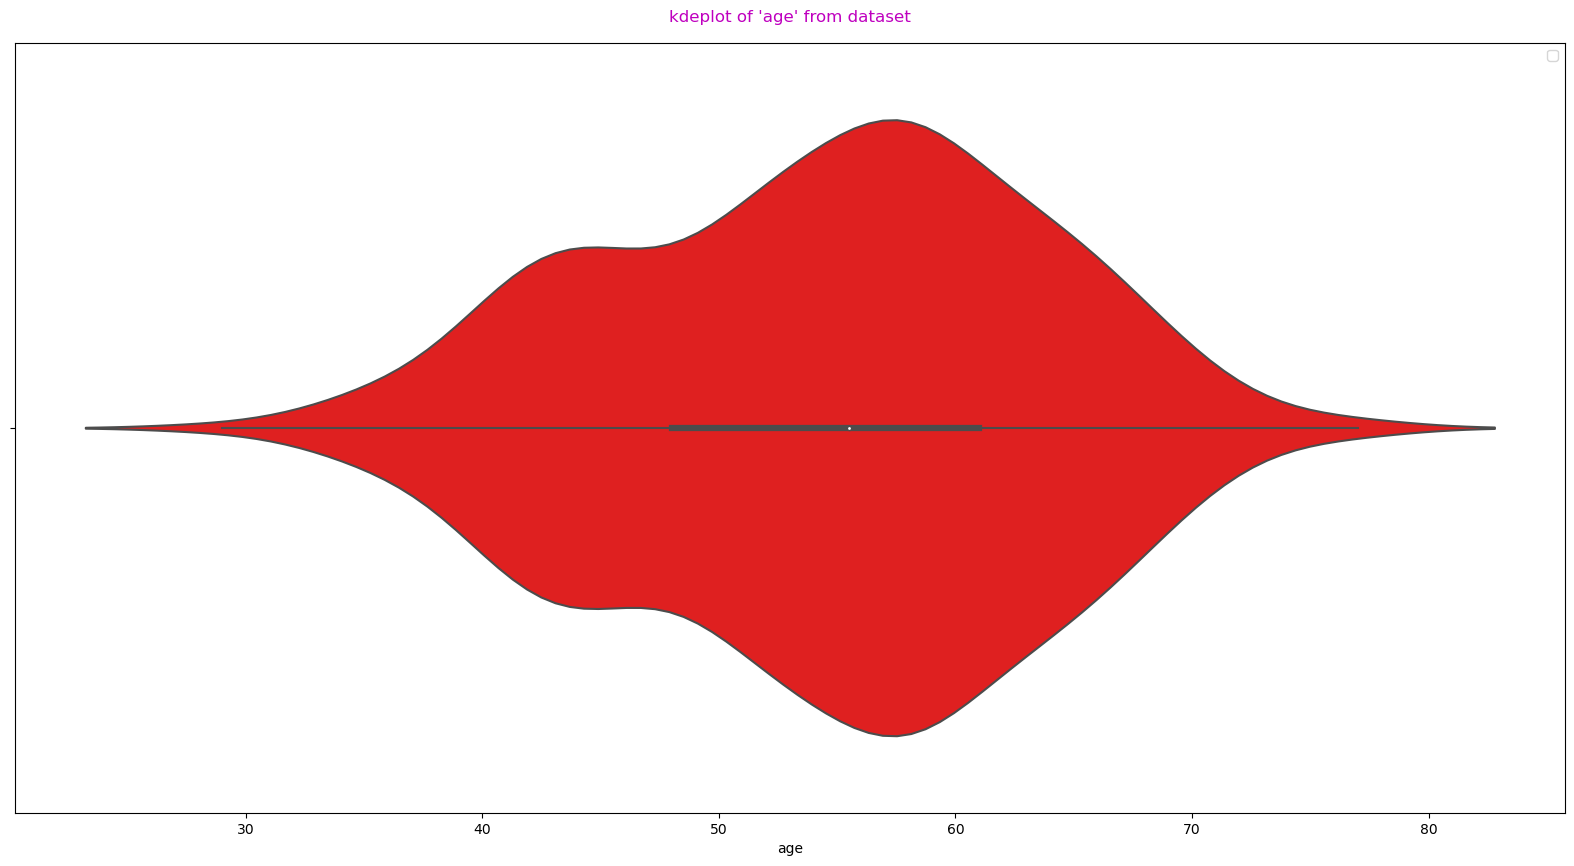

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


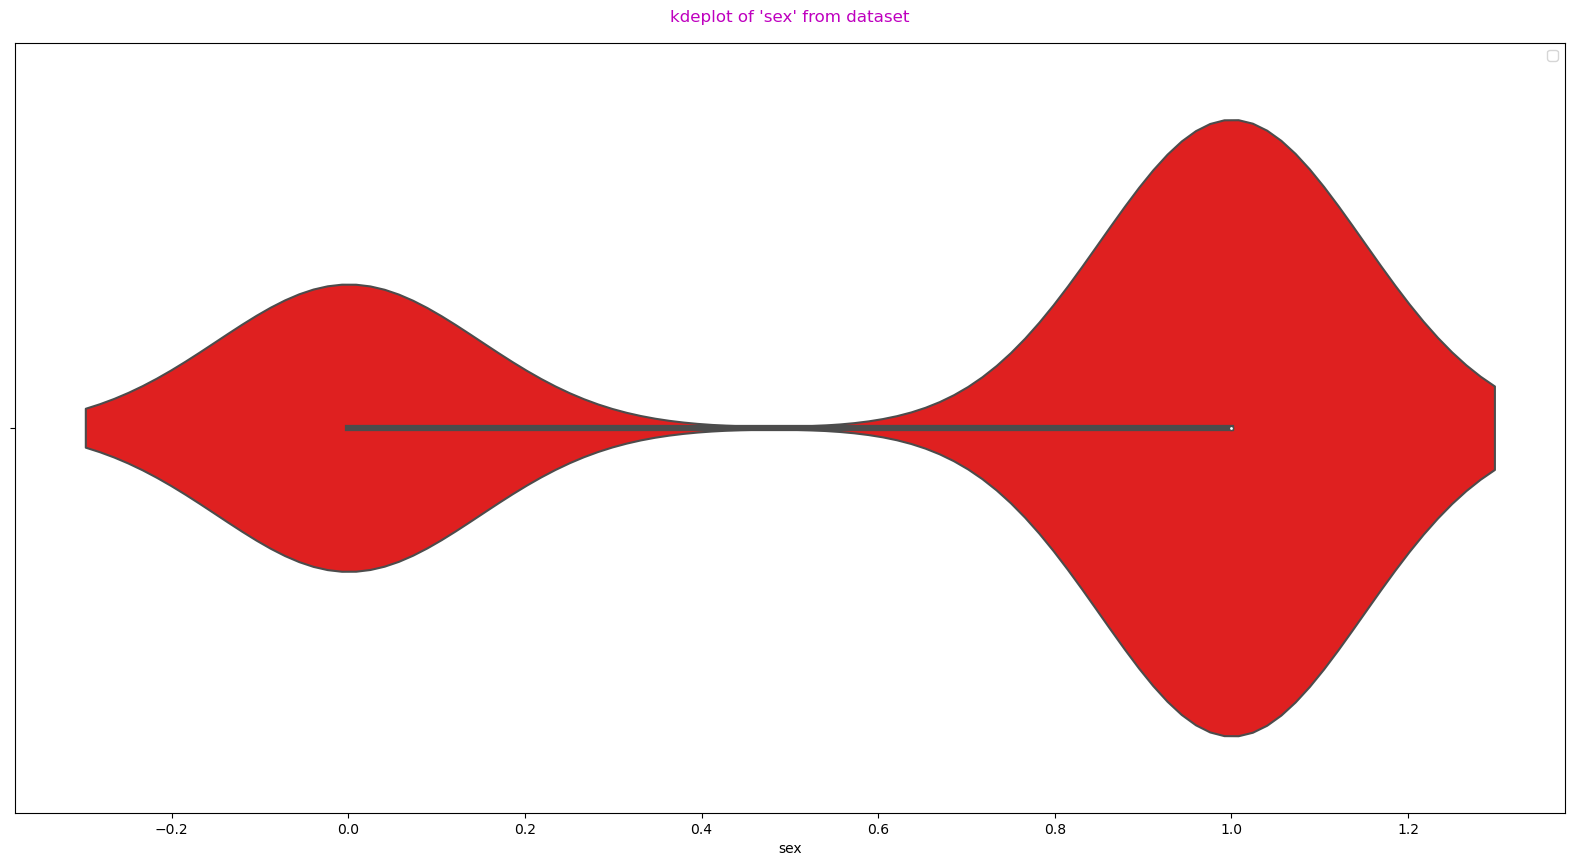

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


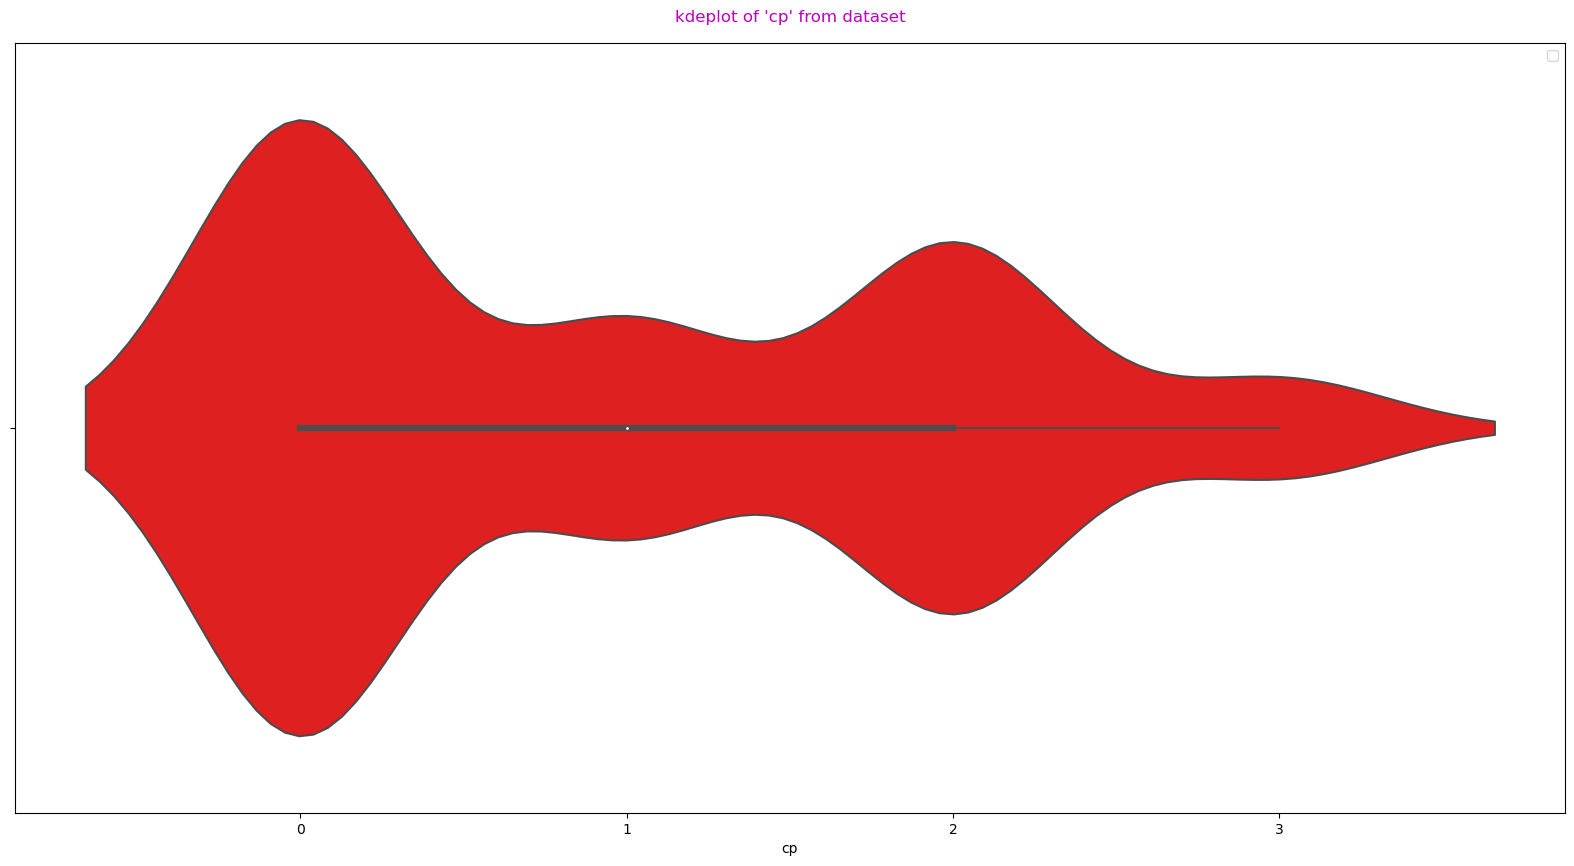

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


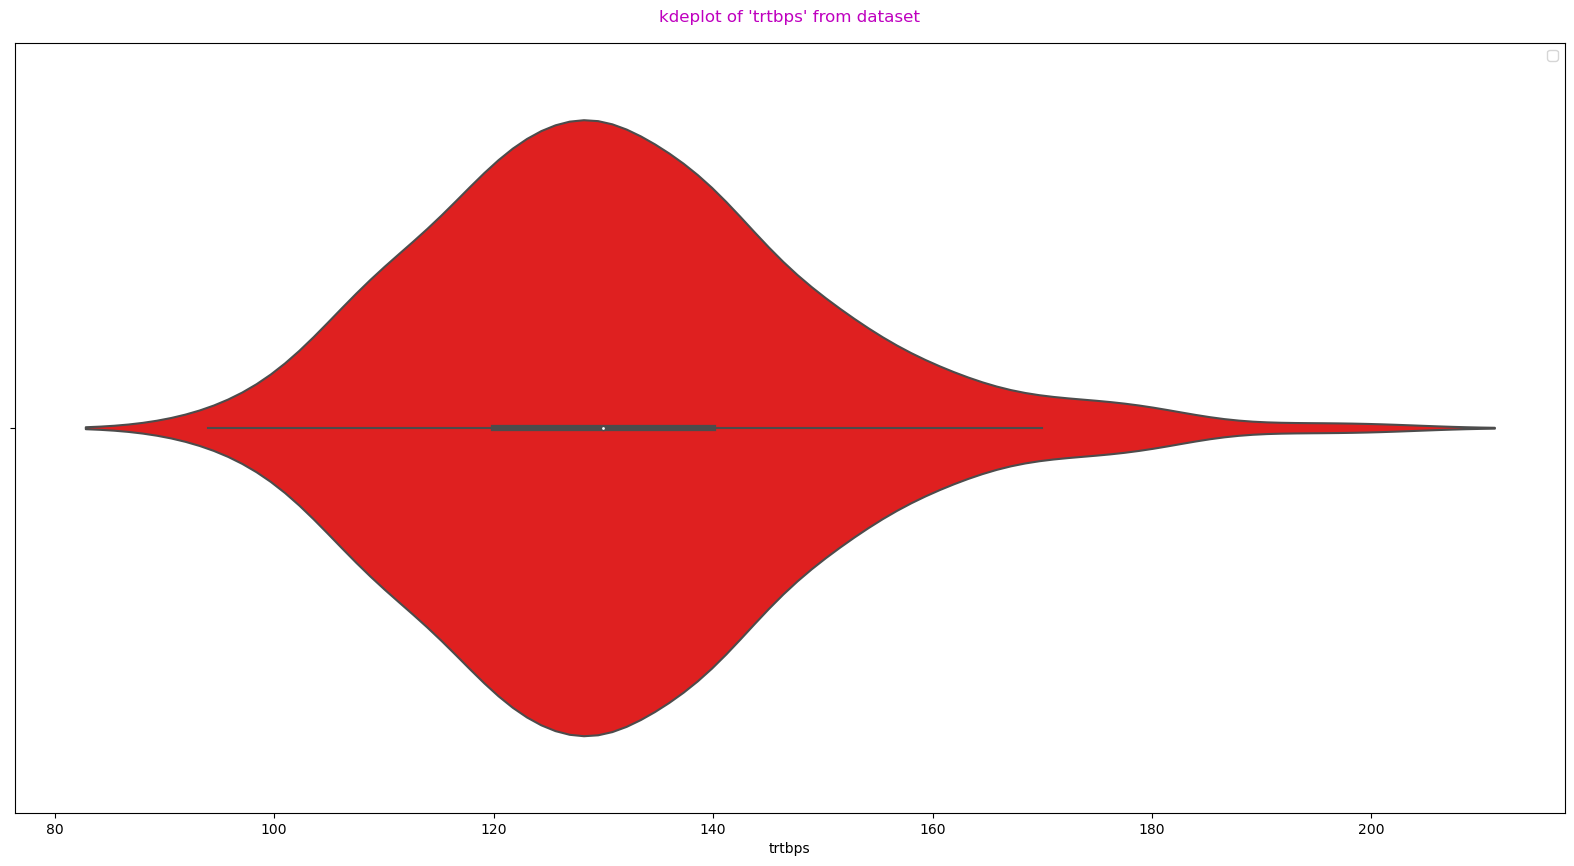

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


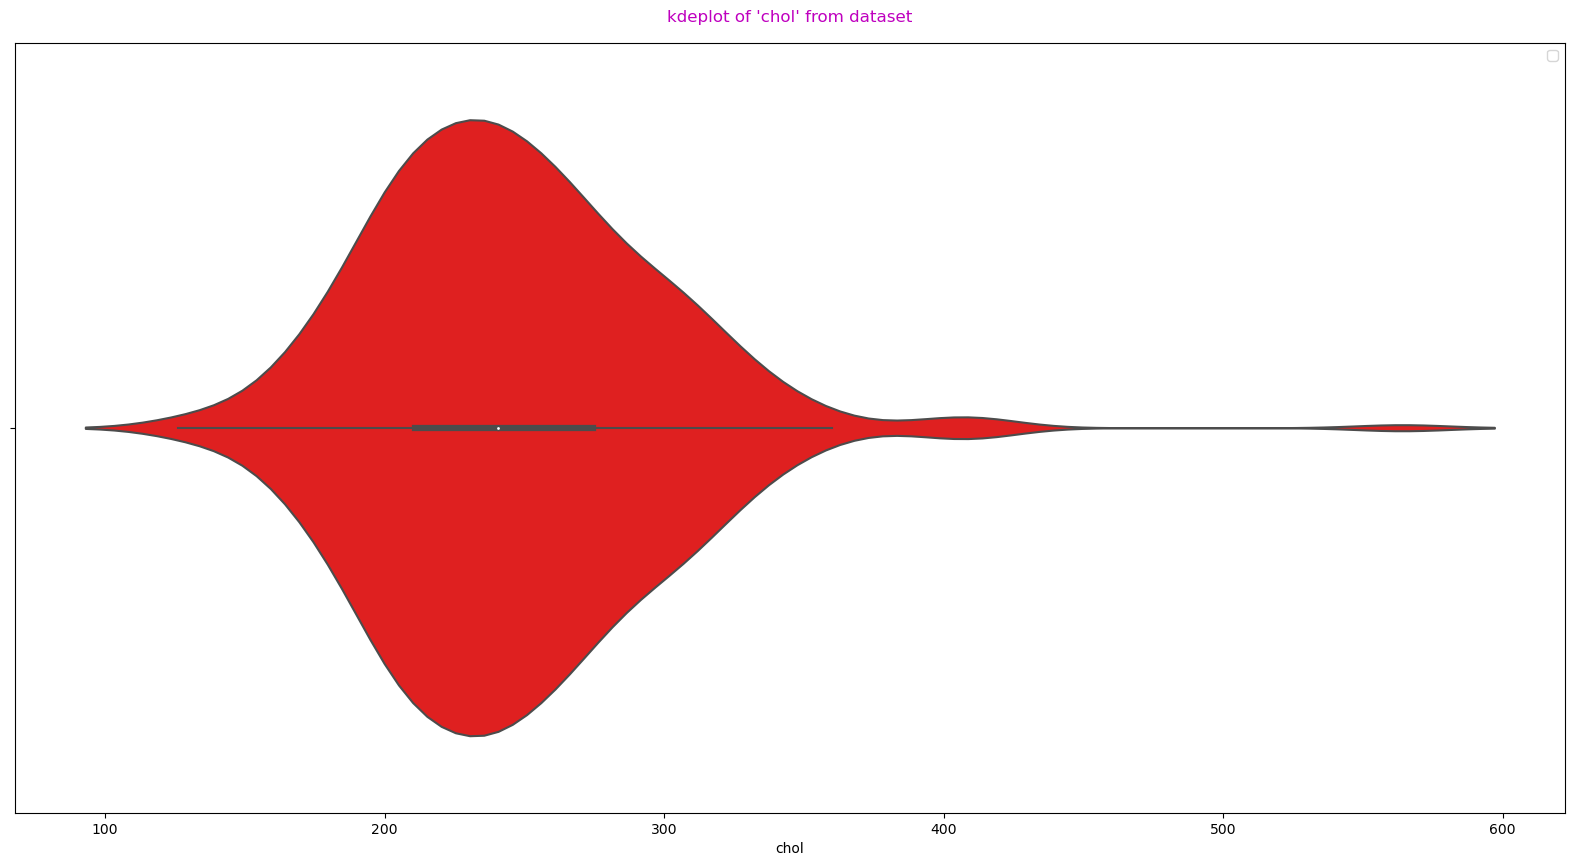

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


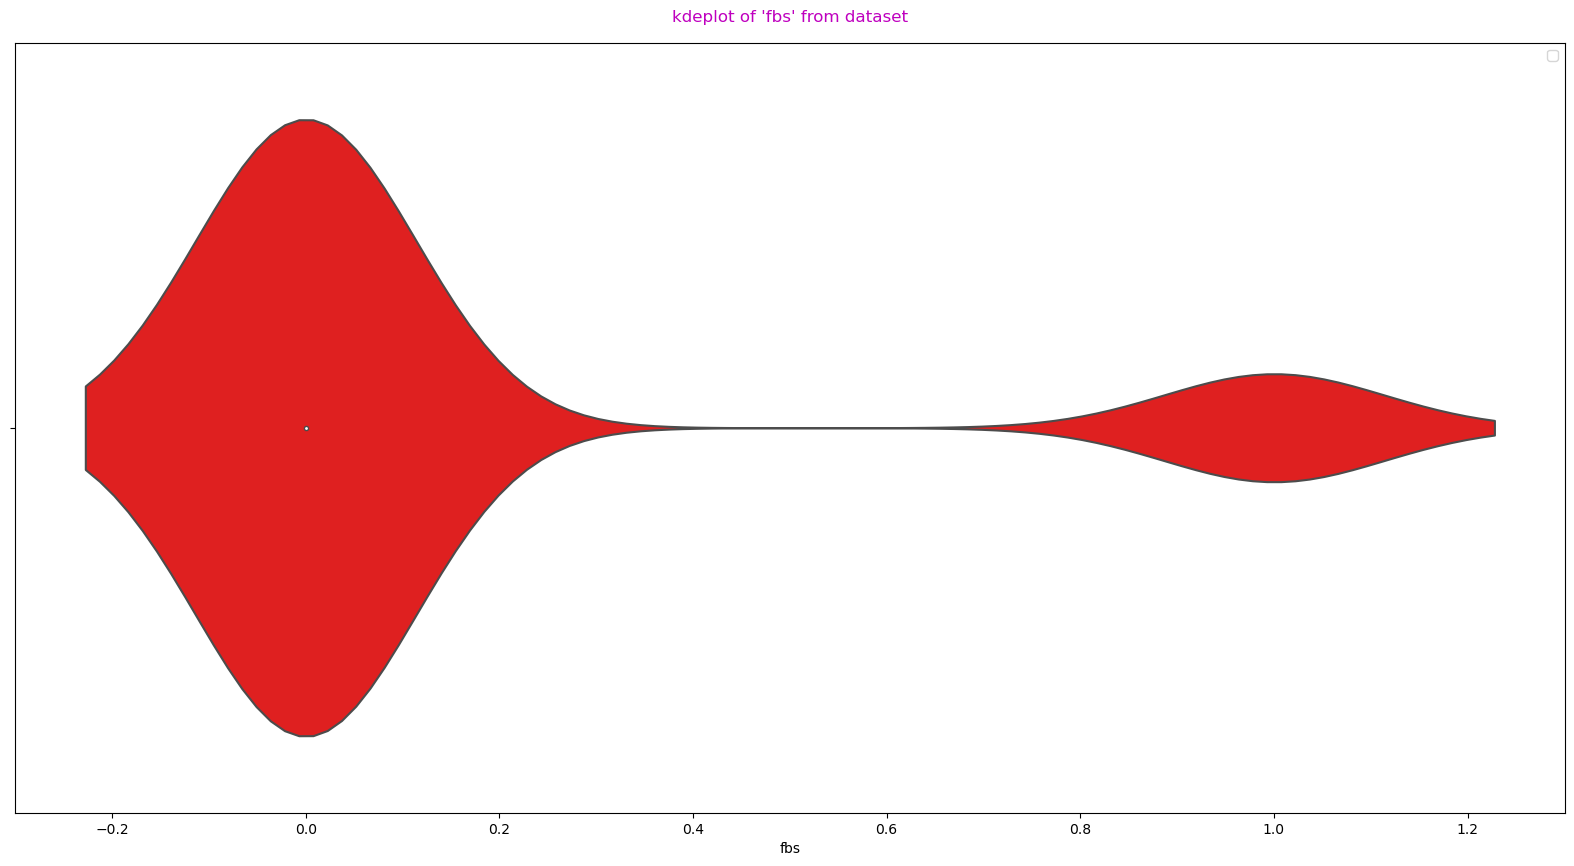

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


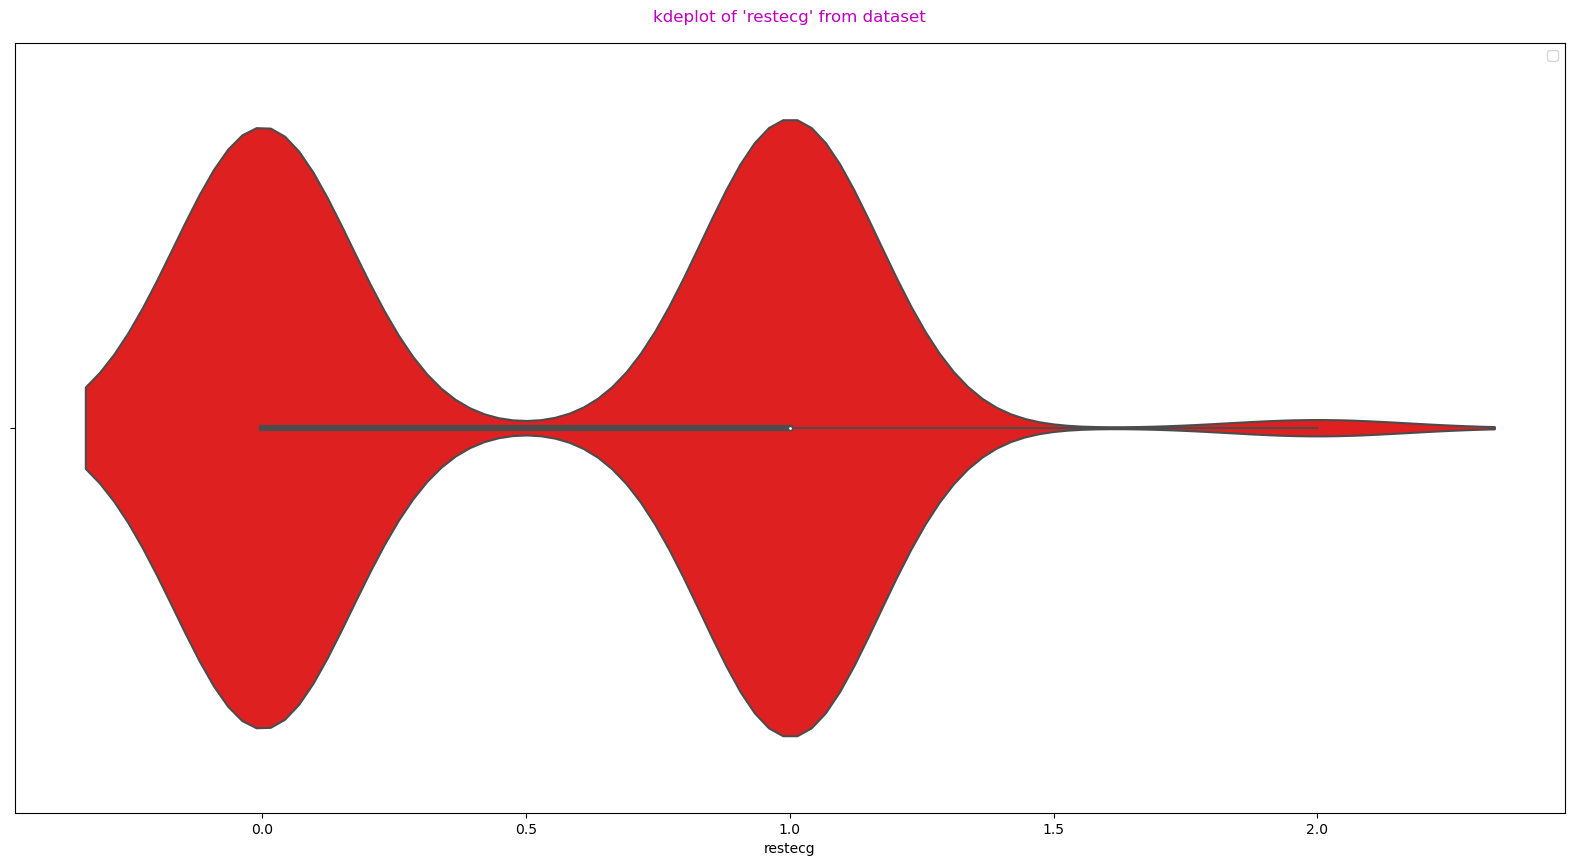

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


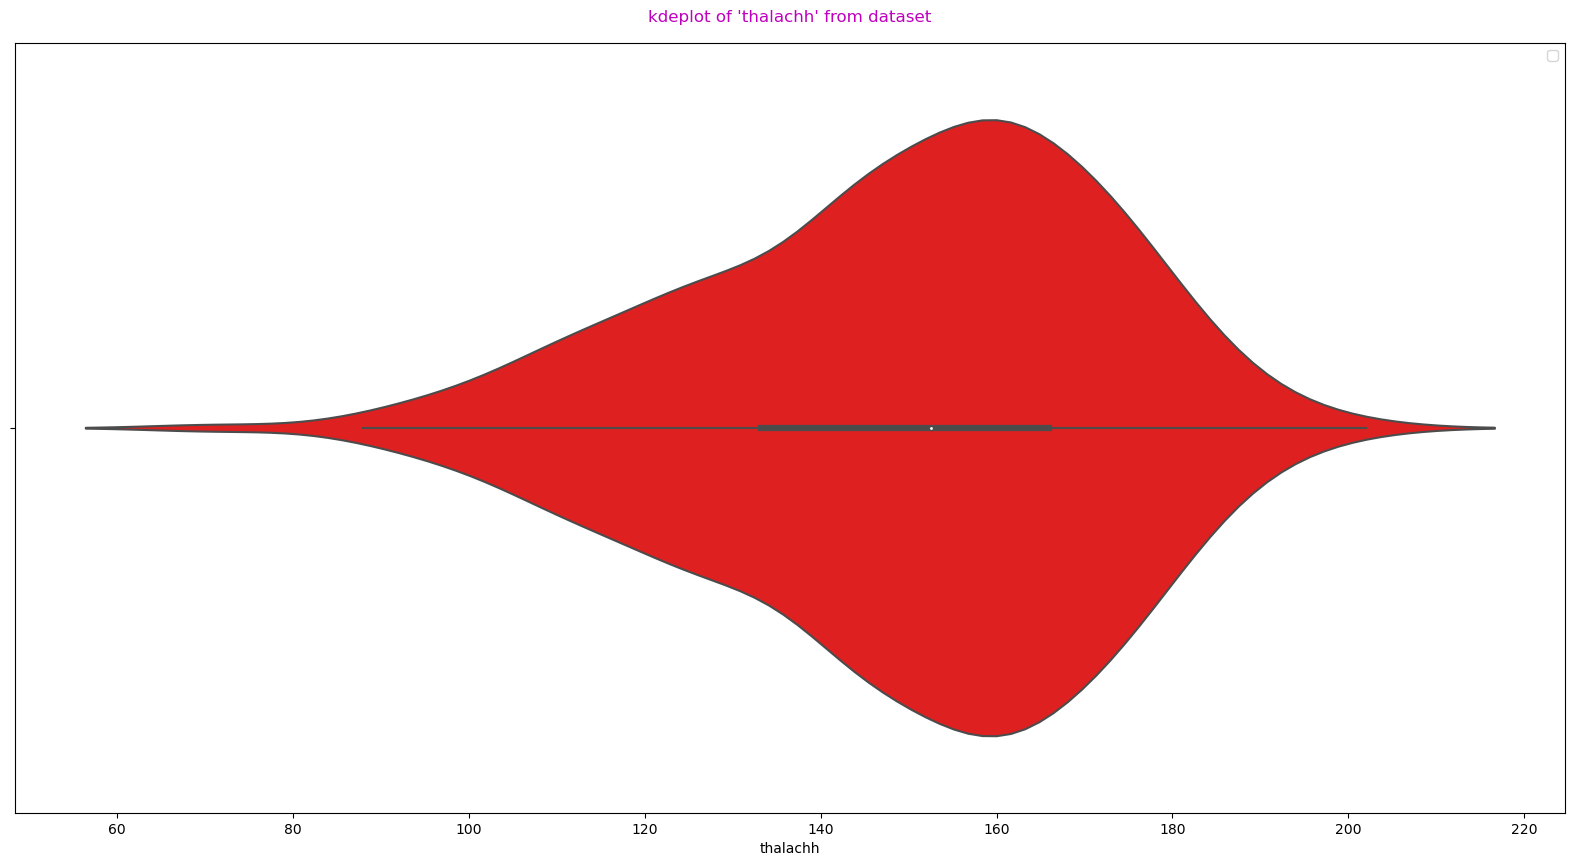

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


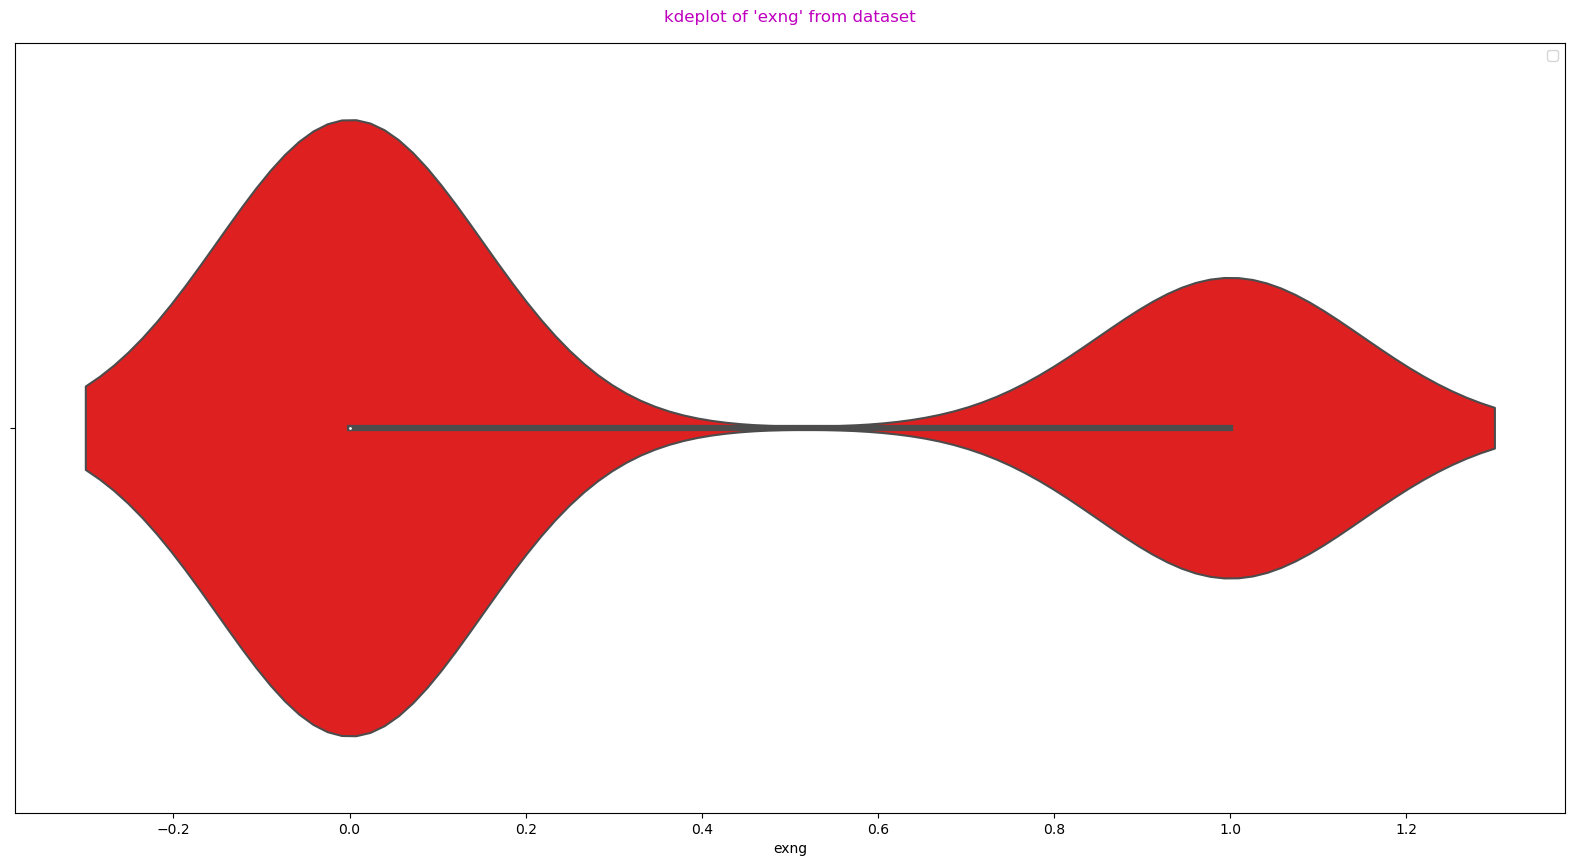

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


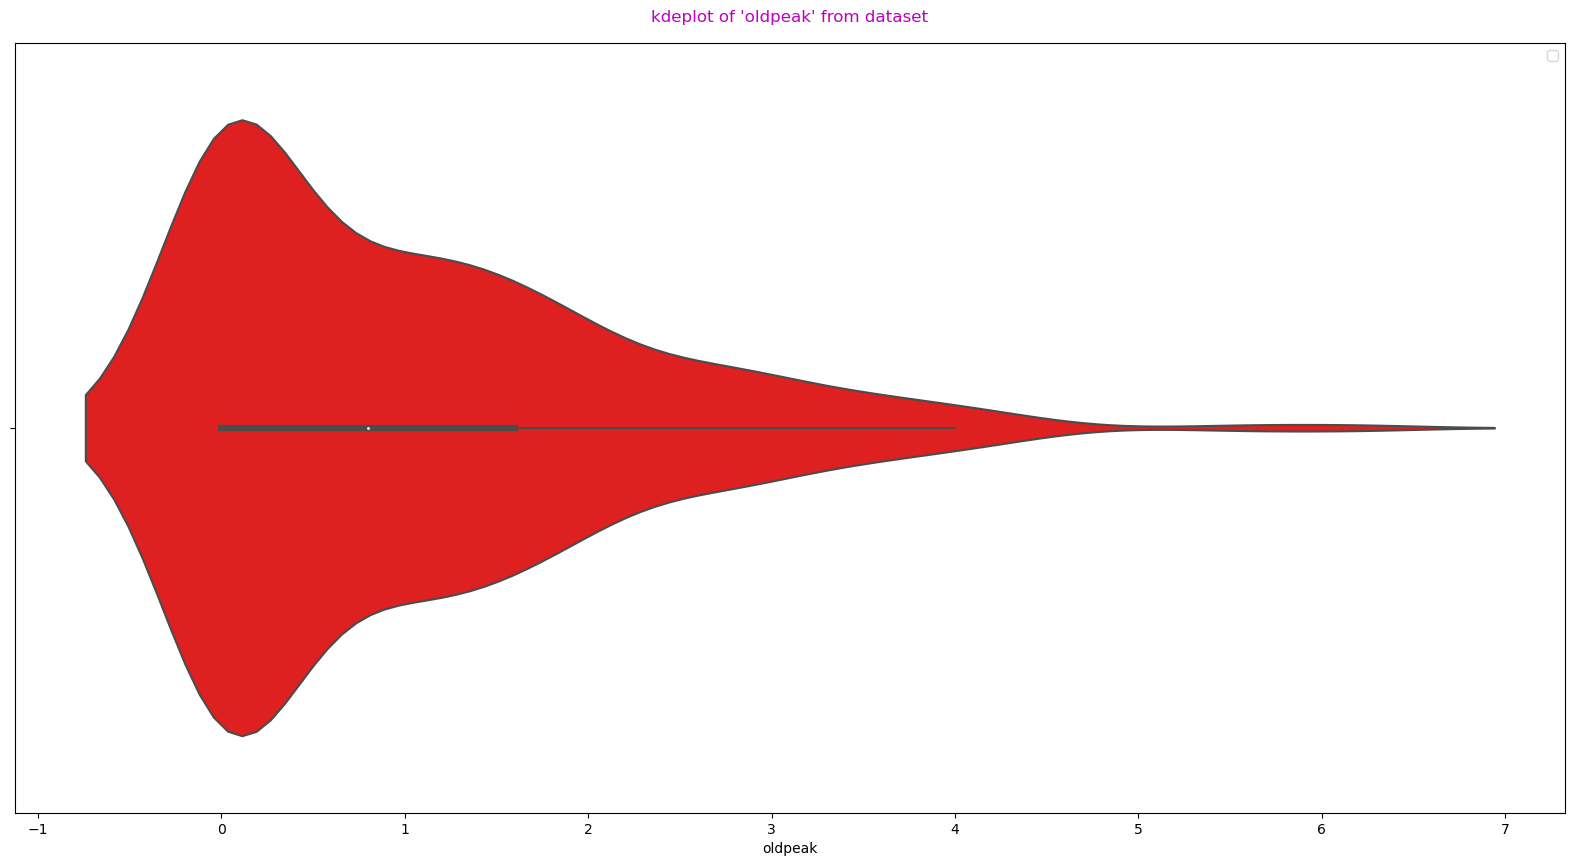

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


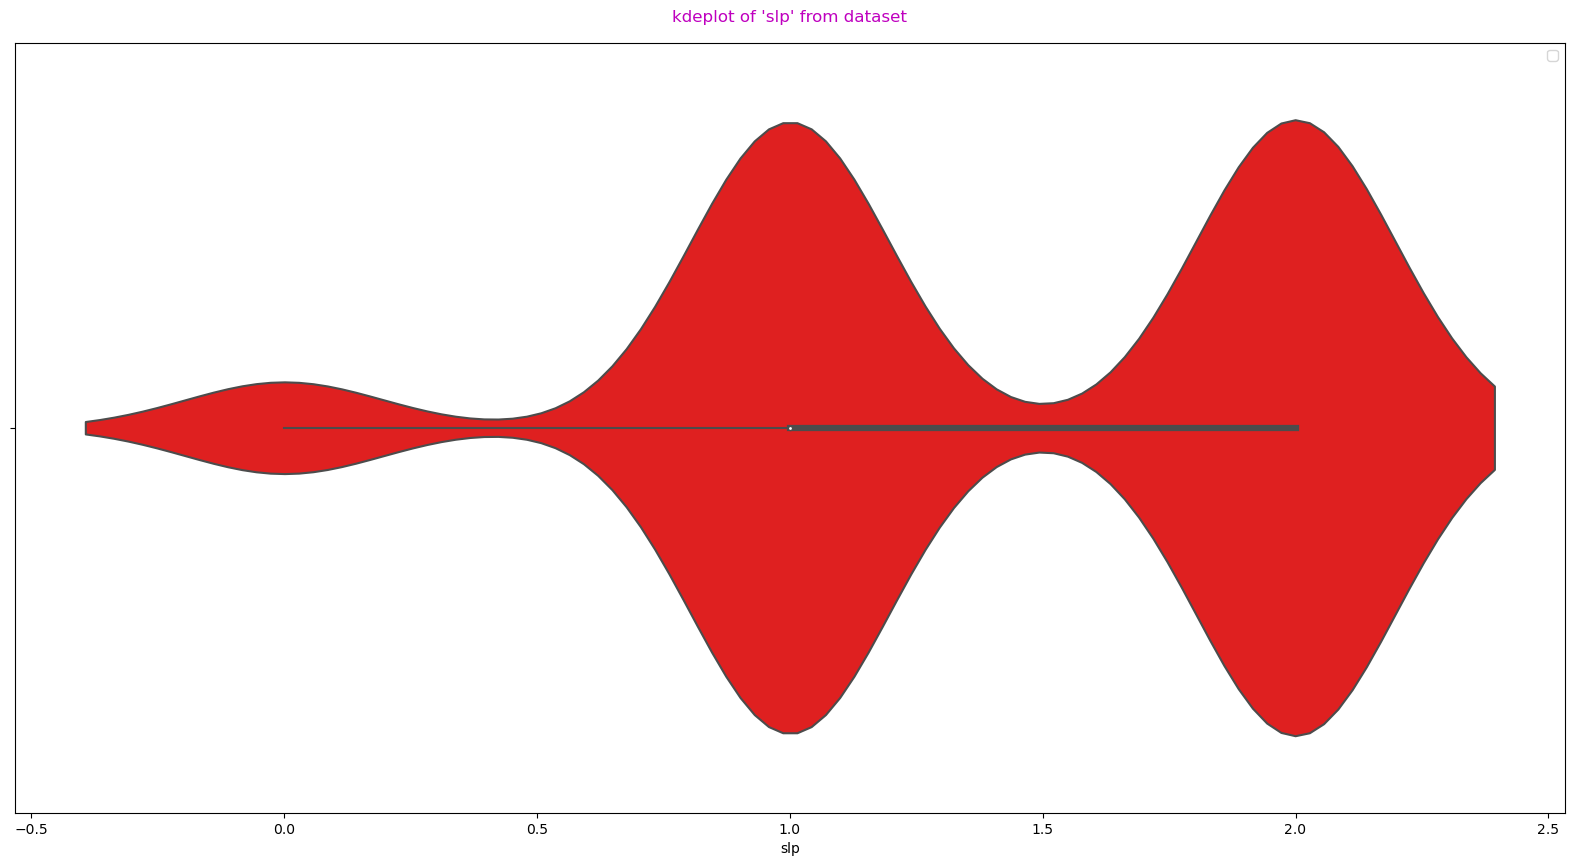

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


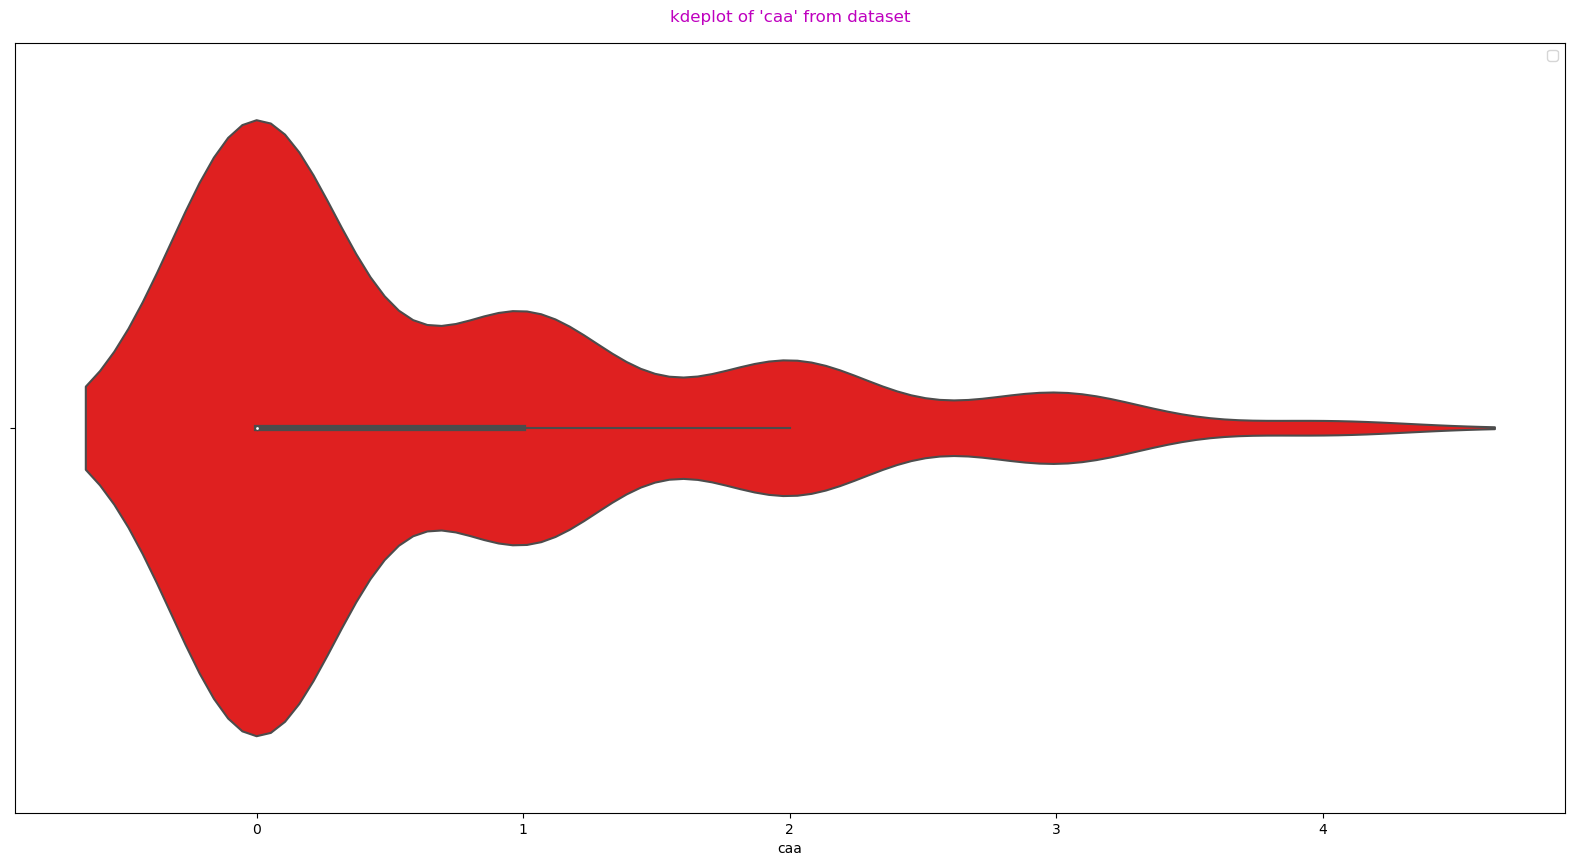

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


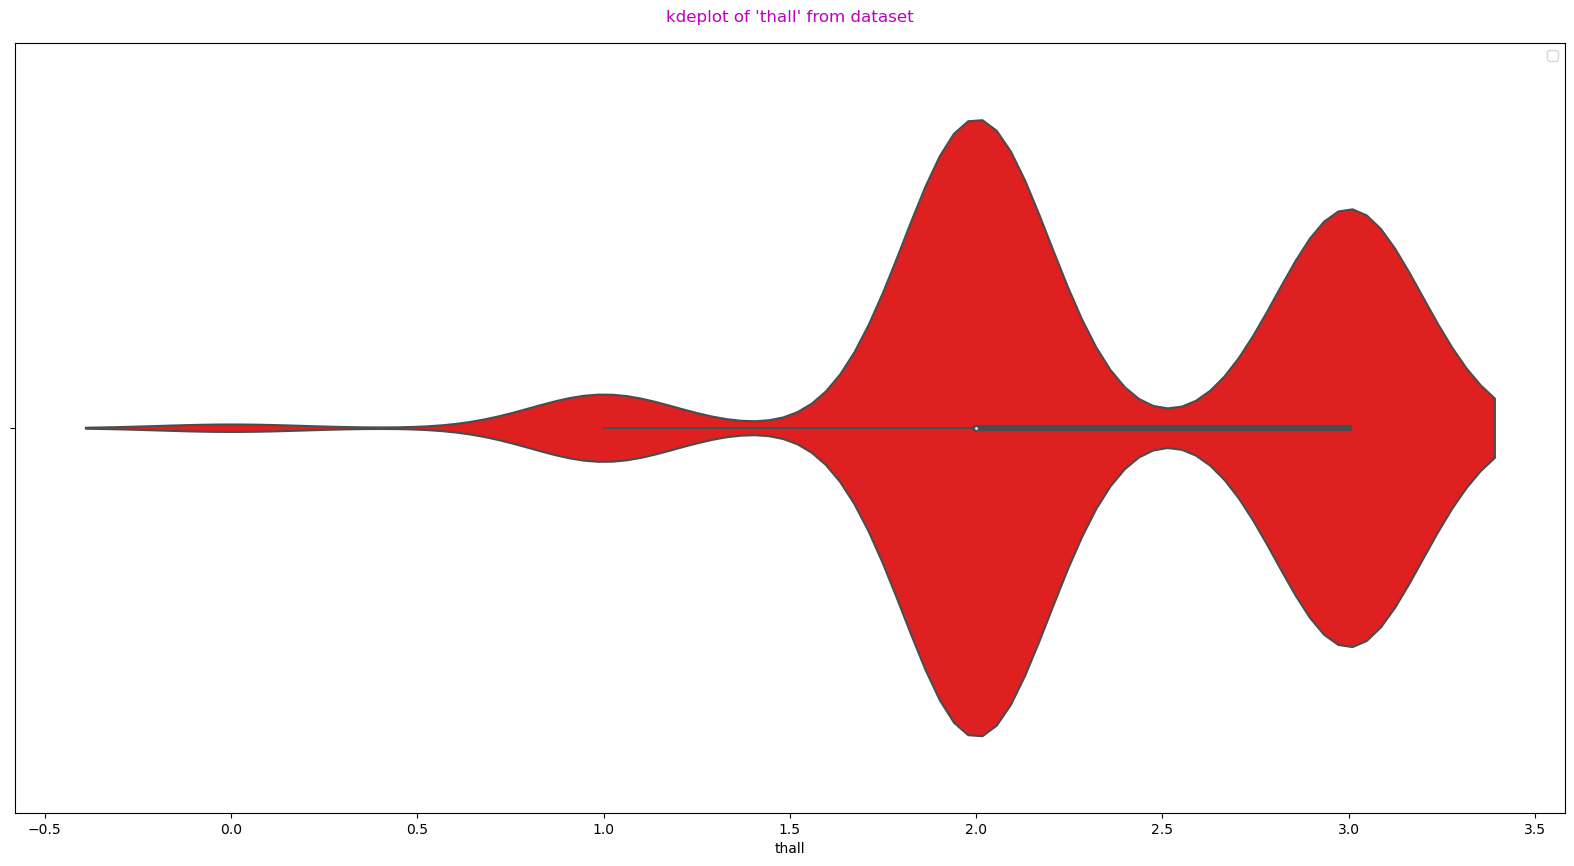

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


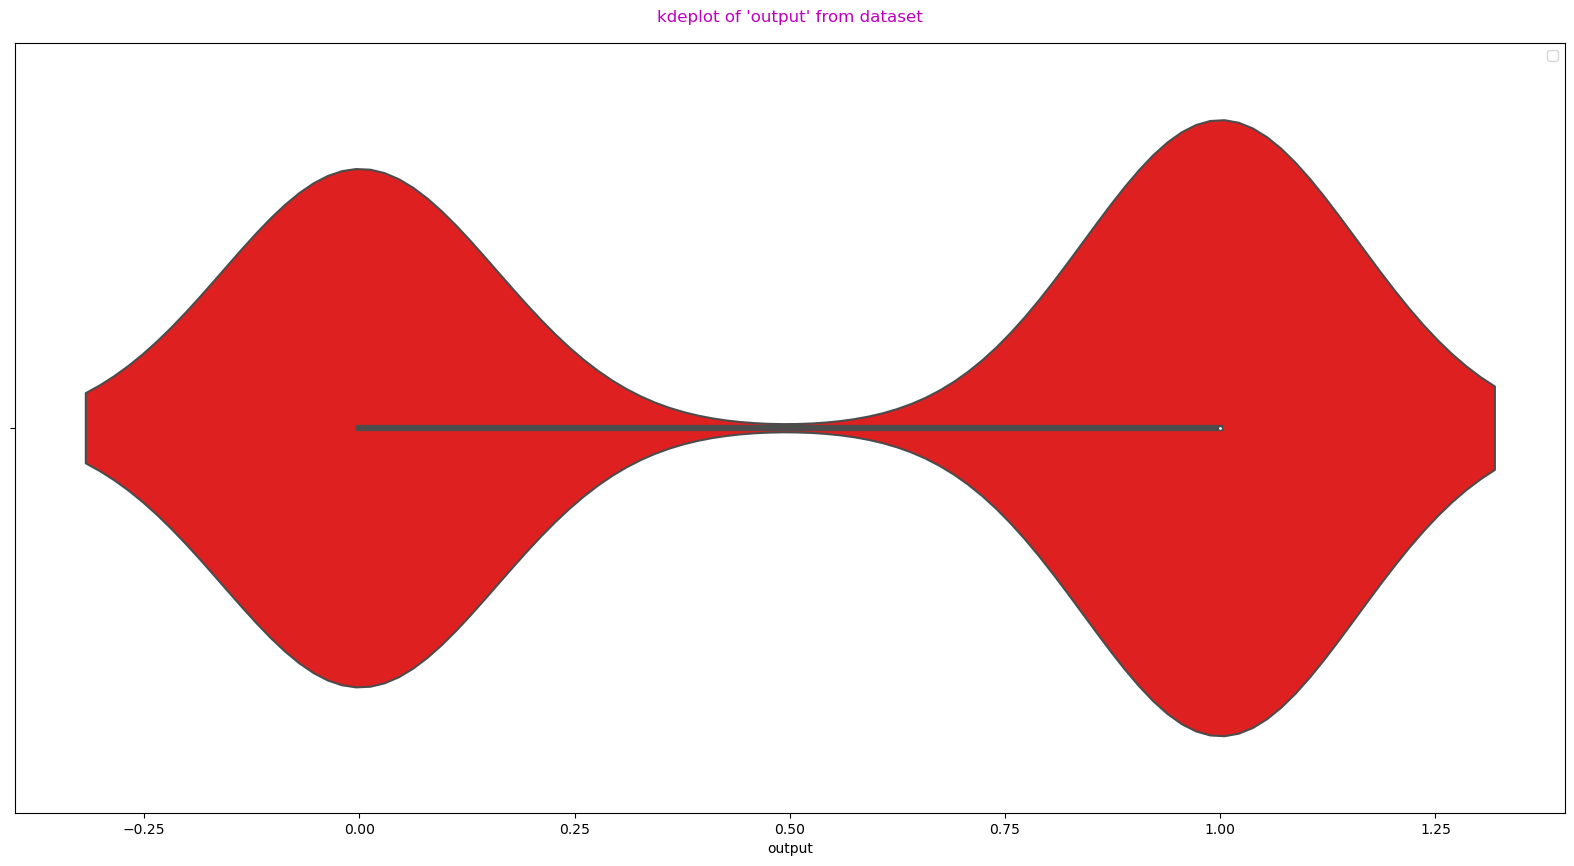

In [11]:

for feature in data.columns:
    plt.figure(figsize = (20,10)) # plt.figure(figsize = (Width,Height))
    sns.violinplot(data = data, x = feature, color = 'r')
    plt.title(f"kdeplot of '{feature}' from dataset", pad = 15, c = 'm')
    plt.xlabel(feature)
    plt.legend()
    plt.show()

In [12]:
X = data.drop('output', axis = 1)
Y = data.output

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
data_x = pd.DataFrame(data = scaler.transform(X), columns = X.columns)
data_x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,-1.485726,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.174856,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,-1.464866,-0.935208,0.478910,-0.106449,-0.418446,0.901657,-1.161988,1.431958,-0.727060,-0.645834,-0.714911,1.119967
298,-1.042904,0.682656,1.976470,-1.232023,0.338703,-0.418446,0.901657,-0.768384,-0.698344,0.135360,-0.645834,-0.714911,1.119967
299,1.503322,0.682656,-0.935208,0.707035,-1.035462,2.389793,0.901657,-0.374779,-0.698344,2.032684,-0.645834,1.274980,1.119967
300,0.285561,0.682656,-0.935208,-0.091401,-2.235438,-0.418446,0.901657,-1.511859,1.431958,0.135360,-0.645834,0.280034,1.119967


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.3, random_state= 12)

In [19]:
from sklearn.naive_bayes import BernoulliNB

In [20]:
model = BernoulliNB()

In [21]:
model.fit(x_train, y_train)

BernoulliNB()

In [22]:
pred = model.predict(x_test)

In [23]:
pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

In [25]:
confusion_matrix(y_test, pred)

array([[43,  2],
       [ 9, 37]], dtype=int64)

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        45
           1       0.95      0.80      0.87        46

    accuracy                           0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



In [27]:
print("Accuracy: ", np.round(accuracy_score(y_test, pred)*100), "%")

Accuracy:  88.0 %
